## Esame Data Science e Applicazioni in Fisica - UniPG
# Osservazione del quadro epidemiologico COVID-19 e studio della possibile interazione con l'inquinamento da polveri sottili nel periodo Gennaio - Giugno 2020
#### Daniele Nucciarelli 
Perugia, 1 settembre 2023

## Abstract

Si sono analizzati dati relativi alla diffusione del COVID-19 nel periodo Gennaio-Giugno 2020 e all'inquinamento da polveri sottili nei comuni umbri nell'anno 2019 e nell'anno 2020 fino al mese di giugno. 

Sono stati evidenziati dei picchi di diffusione del COVID-19 nei comuni di **Giove** e **Porano** tramite l'apprendimento non supervisionato.
Secondo i modelli supervisionati elaborati in questa analisi, non ci sono correzioni significative tra i dati sull'inquinamento da polveri sottili e quelli sulla diffusione del COVID-19.

## Data Overview

Panoramica dei dati.

In [1]:
import pandas as pd

Lettura del csv dei dati

In [2]:
workdir="/home/jovyan/work/" #se il notebook viene lanciato in locale, inserire qui la directory di lavoro
df = pd.read_csv(f"{workdir}data/dataset_exam.csv", index_col=0)

In [3]:
df

City        lat        lng  Population  Density  Surface   
0           Acquasparta  42.691173  12.546451        4611    57.00    81.61  \
1              Allerona  42.812033  11.973053        1722    21.00    82.61   
2               Alviano  42.588208  12.295936        1428    60.00    23.90   
3                Amelia  42.553528  12.416776       11852    89.00   132.50   
4                Arrone  42.583433  12.769865        2703    66.00    41.04   
..                  ...        ...        ...         ...      ...      ...   
87  Tuoro_sul_Trasimeno  43.206848  12.074615        3810    68.00    55.89   
88            Umbertide  43.305636  12.336622       16598    83.00   200.83   
89          Valfabbrica  43.158897  12.600896        3286    36.00    92.30   
90        Vallo_di_Nera  42.754621  12.863760         357     9.86    36.22   
91            Valtopina  43.058282  12.754656        1325    33.00    40.57   

    Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020   
0     1.013507                        6                             1  \
1    -1.309272                        3                             1   
2    -2.148882                        2                             1   
3    -0.832084                        5                             1   
4    -0.479919                        7                             1   
..         ...                      ...                           ...   
87   -1.037773                        0                             0   
88    1.316157                       29                             4   
89    0.868986                        8                             3   
90    1.624309                        0                             0   
91    2.122164                        1                             0   

    AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_std_2019   
0                       0.273585  ...                  7.288500  \
1                       0.336735  ...                  7.038712   
2                       0.252632  ...                  8.908002   
3                       0.317308  ...                  7.749981   
4                       0.475728  ...                  7.416702   
..                           ...  ...                       ...   
87                      0.000000  ...                  8.044015   
88                      1.010526  ...                  8.024829   
89                      0.473684  ...                  7.626592   
90                      0.000000  ...                  7.429745   
91                      0.000000  ...                  7.245096   

    mean_pm10_ug/m3_median_2019  max_pm10_ug/m3_median_2019   
0                     14.674647                   27.591324  \
1                     14.752206                   26.312595   
2                     19.626043                   30.008255   
3                     16.706606                   31.103338   
4                     12.388708                   26.191957   
..                          ...                         ...   
87                    16.669778                   26.659630   
88                    15.469442                   31.068005   
89                    14.094612                   25.738884   
90                    10.847563                   21.805939   
91                    12.358014                   22.791494   

    max_pm10_ug/m3_mean_2019  max_pm10_ug/m3_std_2019   
0                  31.958118                15.960667  \
1                  30.565736                18.320679   
2                  34.685780                17.674601   
3                  36.154165                19.364122   
4                  32.194737                20.364874   
..                       ...                      ...   
87                 30.684311                16.006453   
88                 38.008366                23.129139   
89                 29.684339                16.050027   
90                 26.849045                15.005412   
91  

Il _dataframe_ contiene i dati di tutti i 92 comuni umbri:

In [4]:
len(df.City.unique())

92

In [5]:
df.columns

Index(['City', 'lat', 'lng', 'Population', 'Density', 'Surface', 'Depriv_idx',
       'CovidCases_jan_jun_2020', 'MaxHospitalized_jan_jun_2020',
       'AvgHospitalized_jan_jun_2020', 'Deceased_jan_jun_2020',
       'MaxIntensiveCare_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020',
       'mean_pm10_ug/m3_mean_jan_jun_2020', 'mean_pm10_ug/m3_std_jan_jun_2020',
       'mean_pm10_ug/m3_median_jan_jun_2020',
       'max_pm10_ug/m3_mean_jan_jun_2020', 'max_pm10_ug/m3_std_jan_jun_2020',
       'max_pm10_ug/m3_median_jan_jun_2020',
       'min_pm10_ug/m3_mean_jan_jun_2020', 'min_pm10_ug/m3_std_jan_jun_2020',
       'min_pm10_ug/m3_median_jan_jun_2020',
       'mean_pm10_ug/m3_mean_jan_jun_2020.1',
       'mean_pm10_ug/m3_std_jan_jun_2020.1',
       'mean_pm10_ug/m3_median_jan_jun_2020.1', 'mean_pm10_ug/m3_mean_2019',
       'mean_pm10_ug/m3_std_2019', 'mean_pm10_ug/m3_median_2019',
       'max_pm10_ug/m3_median_2019', 'max_pm10_ug/m3_mean_2019',
       'max_pm10_ug/m3_std_2019', 'min_pm10_ug/

In [6]:
df.describe()

lat        lng     Population     Density     Surface   
count  92.000000  92.000000      92.000000   92.000000   92.000000  \
mean   42.905182  12.472221    9568.315217   89.459565   92.003804   
std     0.273627   0.292700   22012.983364  108.091455   96.297586   
min    42.403124  11.973053      96.000000    2.390000   10.000000   
25%    42.703714  12.234268    1573.750000   32.000000   35.735000   
50%    42.873417  12.481221    2946.500000   66.500000   58.935000   
75%    43.073766  12.718593    6913.500000  108.000000   97.267500   
max    43.548980  13.092928  166969.000000  787.000000  525.780000   

       Depriv_idx  CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020   
count   92.000000                92.000000                     92.000000  \
mean    -0.455099                15.054348                      2.673913   
std      1.357775                39.688447                      6.293392   
min     -5.251338                 0.000000                      0.000000   
25%     -1.204914                 0.000000                      0.000000   
50%     -0.492604                 5.000000                      1.000000   
75%      0.351280                11.000000                      3.000000   
max      2.872051               332.000000                     51.000000   

       AvgHospitalized_jan_jun_2020  Deceased_jan_jun_2020  ...   
count                     92.000000              92.000000  ...  \
mean                       0.801545               0.826087  ...   
std                        1.988844               2.094518  ...   
min                        0.000000               0.000000  ...   
25%                        0.000000               0.000000  ...   
50%                        0.185896               0.000000  ...   
75%                        0.853774               1.000000  ...   
max                       14.971698              14.000000  ...   

       mean_pm10_ug/m3_median_jan_jun_2020.1  mean_pm10_ug/m3_mean_2019   
count                              92.000000                  92.000000  \
mean                               14.475831                  16.430487   
std                                 3.014723                   2.620349   
min                                 7.420084                  10.744741   
25%                                12.673209                  14.608065   
50%                                15.098714                  16.623700   
75%                                16.377223                  18.087417   
max                                21.254544                  22.373268   

       mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019   
count                 92.000000                    92.000000  \
mean                   7.788327                    14.892218   
std                    0.571131                     2.769346   
min                    6.939437                     8.817261   
25%                    7.387661                    12.719118   
50%                    7.648703                    15.328800   
75%                    8.057968                    16.689253   
max                    9.674192                    20.719354   

       max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019   
count                   92.000000                 92.000000  \
mean                    26.885255                 31.688390   
std                      4.958767                  5.724870   
min                     16.463018                 20.667668   
25%                     24.180037                 28.689235   
50%                     26.361343                 30.668131   
75%                     28.995770                 34.065552   
max                     48.968746                 56.453095   

       max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019   
count                92.000000                   92.000000  \
mean                 17.816801                    6.811227   
std                   4.342591                    2.446697   
min                  11.

## Pre-processing

Si procede con il trattamento preliminare dei dati.

### Valori mancanti

Si cercano le colonne che contengono valori mancanti:

In [7]:
pd.isnull(df).any()

City                                     False
lat                                      False
lng                                      False
Population                               False
Density                                  False
Surface                                  False
Depriv_idx                               False
CovidCases_jan_jun_2020                  False
MaxHospitalized_jan_jun_2020             False
AvgHospitalized_jan_jun_2020             False
Deceased_jan_jun_2020                    False
MaxIntensiveCare_jan_jun_2020            False
AvgIntensiveCare_jan_jun_2020            False
mean_pm10_ug/m3_mean_jan_jun_2020        False
mean_pm10_ug/m3_std_jan_jun_2020         False
mean_pm10_ug/m3_median_jan_jun_2020      False
max_pm10_ug/m3_mean_jan_jun_2020         False
max_pm10_ug/m3_std_jan_jun_2020          False
max_pm10_ug/m3_median_jan_jun_2020       False
min_pm10_ug/m3_mean_jan_jun_2020         False
min_pm10_ug/m3_std_jan_jun_2020          False
min_pm10_ug/m

Si trattano separatamente i valori mancanti delle colonne `Region` e `min_pm10_ug/m3_std_2019`.

#### Valore mancante nella colonna Region


La seguente _entry_ presenta un valore nullo nella colonna `Region`:

In [8]:
df.loc[ df["Region"].isnull() ]

City        lat        lng  Population  Density  Surface  Depriv_idx   
80  Spello  42.990945  12.671775        8464    137.0    61.65   -0.730392  \

    CovidCases_jan_jun_2020  MaxHospitalized_jan_jun_2020   
80                        7                             2  \

    AvgHospitalized_jan_jun_2020  ...  mean_pm10_ug/m3_std_2019   
80                      0.608247  ...                  7.861205  \

    mean_pm10_ug/m3_median_2019  max_pm10_ug/m3_median_2019   
80                    15.591546                   27.833431  \

    max_pm10_ug/m3_mean_2019  max_pm10_ug/m3_std_2019   
80                 32.547284                18.056519  \

    min_pm10_ug/m3_median_2019  min_pm10_ug/m3_mean_2019   
80                    4.850987                  6.058144  \

    min_pm10_ug/m3_std_2019      Zone  Region  
80                  4.58133  di valle     NaN  

[1 rows x 36 columns]

Spello è un comune umbro; anche tutti gli altri campionamenti sono stati effettuati in Umbria:

In [9]:
df.groupby('Region').Region.count()

Region
Umbria    91
Name: Region, dtype: int64

Si decide che questa colonna [verrà eliminata](#drop-region) perché non aggiunge informazione allo specifico campionamento

#### Valore mancante nella colonna `min_pm10_ug/m3_std_2019`

I valori di questa colonna rappresentano il valore minimo espresso in μg/m3 della deviazione standard giornaliera di pm10 rilevato nel 2019

La seguente _entry_ presenta un valore nullo nella colonna `Region`:

In [10]:
df.loc[df["min_pm10_ug/m3_std_2019"].isnull()]

City        lat        lng  Population  Density   
45  Monte_Castello_di_Vibio  42.840694  12.352286        1504     47.0  \

    Surface  Depriv_idx  CovidCases_jan_jun_2020   
45    31.95   -1.138733                        0  \

    MaxHospitalized_jan_jun_2020  AvgHospitalized_jan_jun_2020  ...   
45                             0                           0.0  ...  \

    mean_pm10_ug/m3_std_2019  mean_pm10_ug/m3_median_2019   
45                  7.535464                    16.200014  \

    max_pm10_ug/m3_median_2019  max_pm10_ug/m3_mean_2019   
45                   26.999504                 30.651951  \

    max_pm10_ug/m3_std_2019  min_pm10_ug/m3_median_2019   
45                15.562025                    8.564888  \

    min_pm10_ug/m3_mean_2019  min_pm10_ug/m3_std_2019                 Zone   
45                  9.239437                      NaN  collinare e montana  \

    Region  
45  Umbria  

[1 rows x 36 columns]

Non è necessario discutere il trattamento dei dati mancanti in questa colonna perché verrà eliminata, come spiegato [qui](#pm10-2019).

### Eliminazione colonne inutili

Alcune colonne possono essere eliminate, perchè l'informazione in esse contenuta è non interessante o non desiderata.

#### Colonna `Region` <a id='drop-region'></a>

Come già anticipato nella sezione precedente, si elimina la colonna `Region` perché non aggiunge informazioni significative:

In [11]:
df.drop('Region', axis=1, inplace=True)

#### Colonne duplicate

Sono presenti delle colonne \(nominate `*.1`\) le cui descrizioni non sono presenti nella [_features description_](./README.md). 
Si dimostra che si tratta di colonne duplicate, confrontando queste con le colonne originali:

In [12]:
(df["mean_pm10_ug/m3_mean_jan_jun_2020"]==df["mean_pm10_ug/m3_mean_jan_jun_2020.1"]).all()

True

In [13]:
(df["mean_pm10_ug/m3_std_jan_jun_2020"]==df["mean_pm10_ug/m3_std_jan_jun_2020.1"]).all()

True

In [14]:
(df["mean_pm10_ug/m3_median_jan_jun_2020"]==df["mean_pm10_ug/m3_median_jan_jun_2020.1"]).all()

True

ovvero per ognuna delle tre colonne, la `pd.Series` data dal confronto tra due colonne potenzialmente coincidenti contiene tutti `True`.

Pertanto si possono rimuovere le suddette colonne:

In [15]:
df.drop(
    columns=[col_name for col_name in df.columns if col_name.endswith(".1")], 
    inplace=True
)

#### Dati di pm10 del 2019 <a id='pm10-2019'></a>

Visto che il periodo di casi di COVID-19 preso in esame è gennaio - giugno 2019, si decide di eliminare le colonne dell'inquinamento relative al 2019

In [16]:
df=df.drop([col_name for col_name in df.columns if col_name.endswith("2019")], axis=1)

### Normalizzazione su `Population`

Si decide di normalizzare le _feature_ relative ai dati epidemiologici alla popolazione del comune, così che rappresentino l'informazione in maniera intensiva e quindi confrontabile in modo più agevole tra i diversi comuni

In [17]:
col_to_normalize=[
    'CovidCases_jan_jun_2020', 
    'MaxHospitalized_jan_jun_2020',
    'AvgHospitalized_jan_jun_2020', 
    'Deceased_jan_jun_2020',
    'MaxIntensiveCare_jan_jun_2020', 
    'AvgIntensiveCare_jan_jun_2020'
]

def normalize_by_population(dataframe, col_name):
    dataframe[f"{col_name}/Population"]=dataframe[col_name]/df["Population"]
    
for col_name in col_to_normalize:
    normalize_by_population(df, col_name)

### Correzione coordinate Giove

Nella sezione [Plots](#plots), visualizzando le _feature_ `lng` e `lat` ci si accorge che il comune di Giove presenta coordinate errate.

Per questo si effettua una correzione: 

In [18]:
df.loc[df.City == 'Giove'][["lat","lng"]]

lat        lng
35  43.081478  12.775591

In [19]:
df.loc[35,"lat"]=42.5098800
df.loc[35,"lng"]=12.3301500

### Conclusione

In conclusione, il `pd.Dataframe` pre-processato presenta le seguenti dimensioni:

In [20]:
df.shape

(92, 29)

## Plots <a id='plots'></a>

Visualizzazione dei dati.

In [21]:
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

Si raggruppano le variabili in 4 contesti differenti:

In [22]:
demography_cols=[
    'Population', 
    'Density',  
    'Depriv_idx'
]
empidemiology_cols=[
    'CovidCases_jan_jun_2020', 
    'MaxHospitalized_jan_jun_2020',
    'AvgHospitalized_jan_jun_2020', 
    'Deceased_jan_jun_2020',
    'MaxIntensiveCare_jan_jun_2020', 
    'AvgIntensiveCare_jan_jun_2020',
    'CovidCases_jan_jun_2020/Population',
    'MaxHospitalized_jan_jun_2020/Population',
    'AvgHospitalized_jan_jun_2020/Population',
    'Deceased_jan_jun_2020/Population',
    'MaxIntensiveCare_jan_jun_2020/Population',
    'AvgIntensiveCare_jan_jun_2020/Population'
]
geography_cols=[
    'City',
    'lat',
    'lng',
    'Surface', 
    'Zone'
]
pollution_cols=[
    'mean_pm10_ug/m3_mean_jan_jun_2020', 
    'mean_pm10_ug/m3_std_jan_jun_2020',
    'mean_pm10_ug/m3_median_jan_jun_2020',
    'max_pm10_ug/m3_mean_jan_jun_2020', 
    'max_pm10_ug/m3_std_jan_jun_2020',
    'max_pm10_ug/m3_median_jan_jun_2020',
    'min_pm10_ug/m3_mean_jan_jun_2020', 
    'min_pm10_ug/m3_std_jan_jun_2020',
    'min_pm10_ug/m3_median_jan_jun_2020'
]

Si riordinano le colonne del `pd.DataFrame` in base ai contesti:

In [23]:
df=df[demography_cols+geography_cols+pollution_cols+empidemiology_cols]

### Grafico interattivo Geo-Epidemo-Demografico COVID-19 

Si fornisce uno _scatter plot_ interattivo realizzato utilizzando `plotly` (vedi [interactive_outputs](https://ipywidgets.readthedocs.io/en/7.6.5/examples/Using%20Interact.html#More-control-over-the-user-interface:-interactive_output)).

Si definisce la funzione `scatter_updater` che viene chiamata ad ogni interazione dell'utente con degli input _dropdown_ dai quali l'utente può selezionare le feature da visualizzare nel grafico:

In [24]:
def build_scatter_updater(dataframe, title='Interactive Scatter Plot with Color', **kwargs):
    """ Restituisce un callable che viene chiamato ad ogni update di un plotly.express.scatter plot. 
            Va specificato obbligatoriamente:
                (pd.DataFrame) dataframe: il pd.DataFrame dei dati
            Eventualmente si può specificare:
                (str) title: il titolo del grafico
                kwargs addizionali da passare a plotly.express.scatter
    """
    def scatter_updater(x_feature, y_feature, color_feature):
        fig = px.scatter(
            dataframe, 
            x=x_feature,
            y=y_feature,
            color=color_feature,
            **kwargs
        )
        fig.update_layout(title=title)
        fig.show()
        
    return scatter_updater

Definiti dei parametri di stile, si realizzano i _dropdown_ attraverso i quali l'utente può interagire con il grafico

In [25]:
style_kwargs={
    "layout": widgets.Layout(width='auto'),
    "style" : {'description_width': 'initial'}
}

In [26]:
x_dropdown = widgets.Dropdown(
    options=demography_cols,
    description='Variabile demografica [asse x]:',
    value="Density",
    **style_kwargs
)
y_dropdown = widgets.Dropdown(
    options=empidemiology_cols,
    description='Variabile epidemiologica [asse y]:',
    value="CovidCases_jan_jun_2020/Population",
    **style_kwargs
)
color_dropdown = widgets.Dropdown(
    options=geography_cols,
    description='Variabile geografica [asse z]:',
    value="Zone",
    **style_kwargs
)

Si costruisce il grafico

In [27]:
output = widgets.interactive_output(
    build_scatter_updater(
        df, 
        title="Grafico Geo-Epidemo-Demografico COVID-19 [Umbria, 2020]",
        hover_name="City",
        width=900,
        height=600
    ), 
    { 'x_feature': x_dropdown, 'y_feature': y_dropdown, 'color_feature':color_dropdown}
)

display(x_dropdown, y_dropdown, color_dropdown, output)

Dropdown(description='Variabile demografica [asse x]:', index=1, layout=Layout(width='auto'), options=('Popula…

Dropdown(description='Variabile epidemiologica [asse y]:', index=6, layout=Layout(width='auto'), options=('Cov…

Dropdown(description='Variabile geografica [asse z]:', index=4, layout=Layout(width='auto'), options=('City', …

Output()

**Grafico Geo-Epidemo-Demografico COVID-19 [Umbria, 2020]**: è possibile mettere in relazione variabili relative a epidemiologia del COVID-19, geografia e demografia del territorio umbro selezionandole dalle liste _dropdown_.

### Grafico interattivo `Population` - `Density`

Si fornisce ora uno _scatter plot_ tridimensionale interattivo avente negli assi orizzontali le _feature_ `Population` e `Density` (lasciando all'utente la possibilità si selezionarne altre) e nell'asse verticale una feature a scelta dell'utente, a cui verrà anche associata una scala di colore.

Si opera analogamente al caso precedente

In [28]:
def build_scatter_3d_updater(dataframe, title='Interactive Scatter Plot 3D', **kwargs):
    """ Restituisce un callable che viene chiamato ad ogni update di un plotly.express.scatter_3d plot. 
            Va specificato obbligatoriamente:
                (pd.DataFrame) dataframe: il pd.DataFrame dei dati
            Eventualmente si può specificare:
                (str) title: il titolo del grafico
                kwargs addizionali da passare a plotly.express.scatter_3d
    """
    def scatter_3d_updater(x_feature, y_feature, z_feature, color_feature):
        fig = px.scatter_3d(
            dataframe, 
            x=x_feature,
            y=y_feature,
            z=z_feature, 
            color=color_feature,
            **kwargs
        )
        fig.update_layout(title=title)
        fig.show()
        
    return scatter_3d_updater

In [29]:
x_dropdown_3d = widgets.Dropdown(
    options=df.columns,
    description='asse x:',
    value="Population",
    **style_kwargs
)
y_dropdown_3d = widgets.Dropdown(
    options=df.columns,
    description='asse y:',
    value="Density",
    **style_kwargs
)
z_dropdown_3d = widgets.Dropdown(
    options=df.columns,
    description='asse z:',
    value="CovidCases_jan_jun_2020/Population",
    **style_kwargs
)

In [30]:
output_3d = widgets.interactive_output(
    build_scatter_3d_updater(
        df, 
        title="Grafico 3D Popolazione-Densità COVID-19 [Umbria, 2020]",
        hover_name="City",
        width=1000,
        height=700
    ), 
    { 'x_feature': x_dropdown_3d, 'y_feature': y_dropdown_3d, 'z_feature':z_dropdown_3d, 'color_feature':z_dropdown_3d}
)

display(x_dropdown_3d, y_dropdown_3d, z_dropdown_3d, output_3d)

Dropdown(description='asse x:', layout=Layout(width='auto'), options=('Population', 'Density', 'Depriv_idx', '…

Dropdown(description='asse y:', index=1, layout=Layout(width='auto'), options=('Population', 'Density', 'Depri…

Dropdown(description='asse z:', index=23, layout=Layout(width='auto'), options=('Population', 'Density', 'Depr…

Output()

### Studio della correlazione lineare tra le feature

#### _Encoding_ delle variabili categoriche

Per studiare la correlazione lineare tra le _feature_, è necessario effettuare l'_encoding_ delle variabili categoriche.
La _feature_ `City` è costituita da valori unici, quindi non è interessante nello studio della correlazione.

Per quanto riguarda invece la _feature_ `Zone`, si sceglie la tecnica del _One-Hot-Encoding_:

In [31]:
pd.get_dummies(df, columns=['Zone'], prefix=['zona'], dtype=int)

Population  Density  Depriv_idx                 City        lat   
0         4611    57.00    1.013507          Acquasparta  42.691173  \
1         1722    21.00   -1.309272             Allerona  42.812033   
2         1428    60.00   -2.148882              Alviano  42.588208   
3        11852    89.00   -0.832084               Amelia  42.553528   
4         2703    66.00   -0.479919               Arrone  42.583433   
..         ...      ...         ...                  ...        ...   
87        3810    68.00   -1.037773  Tuoro_sul_Trasimeno  43.206848   
88       16598    83.00    1.316157            Umbertide  43.305636   
89        3286    36.00    0.868986          Valfabbrica  43.158897   
90         357     9.86    1.624309        Vallo_di_Nera  42.754621   
91        1325    33.00    2.122164            Valtopina  43.058282   

          lng  Surface  mean_pm10_ug/m3_mean_jan_jun_2020   
0   12.546451    81.61                          16.448845  \
1   11.973053    82.61                          16.009011   
2   12.295936    23.90                          22.556083   
3   12.416776   132.50                          18.391294   
4   12.769865    41.04                          13.751943   
..        ...      ...                                ...   
87  12.074615    55.89                          19.158259   
88  12.336622   200.83                          17.415113   
89  12.600896    92.30                          16.041621   
90  12.863760    36.22                          11.821318   
91  12.754656    40.57                          14.153393   

    mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020   
0                           7.735424                            15.089290  \
1                           8.708984                            14.280218   
2                          11.939011                            19.562969   
3                           8.453660                            16.210499   
4                           6.993753                            12.296421   
..                               ...                                  ...   
87                         14.846033                            16.056410   
88                         12.497089                            14.874236   
89                         10.768399                            14.275885   
90                          6.803103                            10.104532   
91                          8.668405                            12.479675   

    ...  AvgIntensiveCare_jan_jun_2020  CovidCases_jan_jun_2020/Population   
0   ...                       0.075472                            0.001301  \
1   ...                       0.000000                            0.001742   
2   ...                       0.000000                            0.001401   
3   ...                       0.000000                            0.000422   
4   ...                       0.000000                            0.002590   
..  ...                            ...                                 ...   
87  ...                       0.000000                            0.000000   
88  ...                       0.231579                            0.001747   
89  ...                       0.073684                            0.002435   
90  ...                       0.000000                            0.000000   
91  ...                       0.000000                            0.000755   

    MaxHospitalized_jan_jun_2020/Population   
0                                  0.000217  \
1                                  0.000581   
2                                  0.000700   
3                                  0.000084   
4                                  0.000370   
..                                      ...   
87                                 0.000000   
88                                 0.000241   
89                                 0.000913   
90                                 0.000000   
91                                 0.00

A questo punto si possono rimuovere le _feature_ categoriche:

In [32]:
corrdf=df.drop(["Zone", "City"],axis=1)

#### Grafici di correlazione

Si rappresenta la matrice di grafici di relazione tra le _feature_:

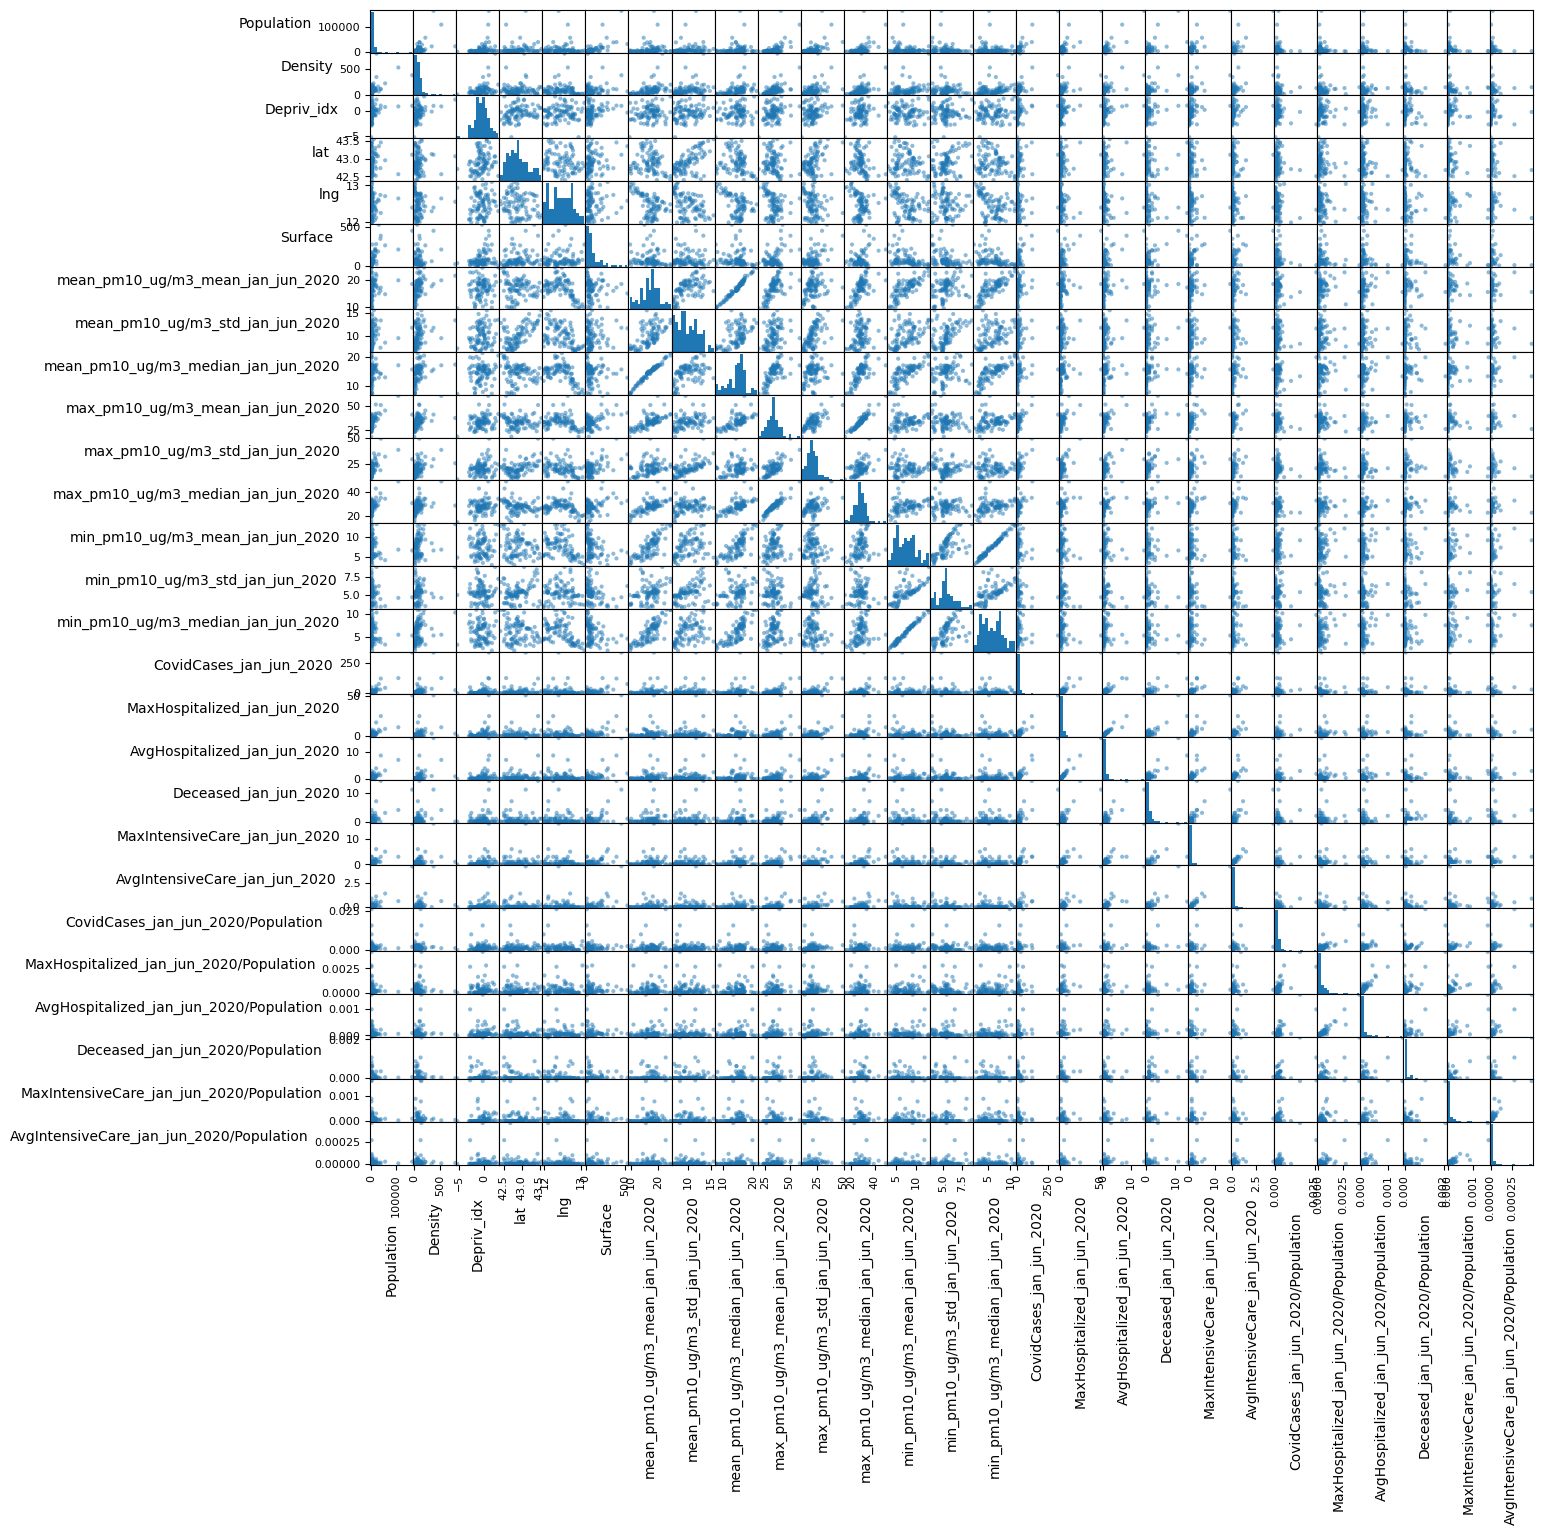

In [33]:
axes = pd.plotting.scatter_matrix(
    corrdf,
    hist_kwds={'bins':15}, 
    figsize=(15,15)
)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

Dato l'alto numero di _feature_, la rappresentazione appena fornita non gode di chiara lettura. Pertanto si rappresenta una _heatmap_:

In [34]:
corr=corrdf.corr()

Per una lettura più chiara dell'_heatmap_ si suggerisce l'utilizzo una maschera che nasconda gli elementi di correlazione appartenenti ad alcuni contesti comuni:

In [35]:
w=corrdf.shape[1]
mask = np.full(
    (w,w),
    False
)

epidemiology_indexes=[corrdf.columns.get_loc(var_name) for var_name in empidemiology_cols]
for i in epidemiology_indexes:
    mask[i, epidemiology_indexes] = True
    mask[epidemiology_indexes, i] = True

pollution_indexes=[corrdf.columns.get_loc(var_name) for var_name in pollution_cols]
for i in pollution_indexes:
    mask[i, pollution_indexes] = True
    mask[pollution_indexes, i] = True

> NOTA: **per togliere la maschera** basta commentare la riga indicata

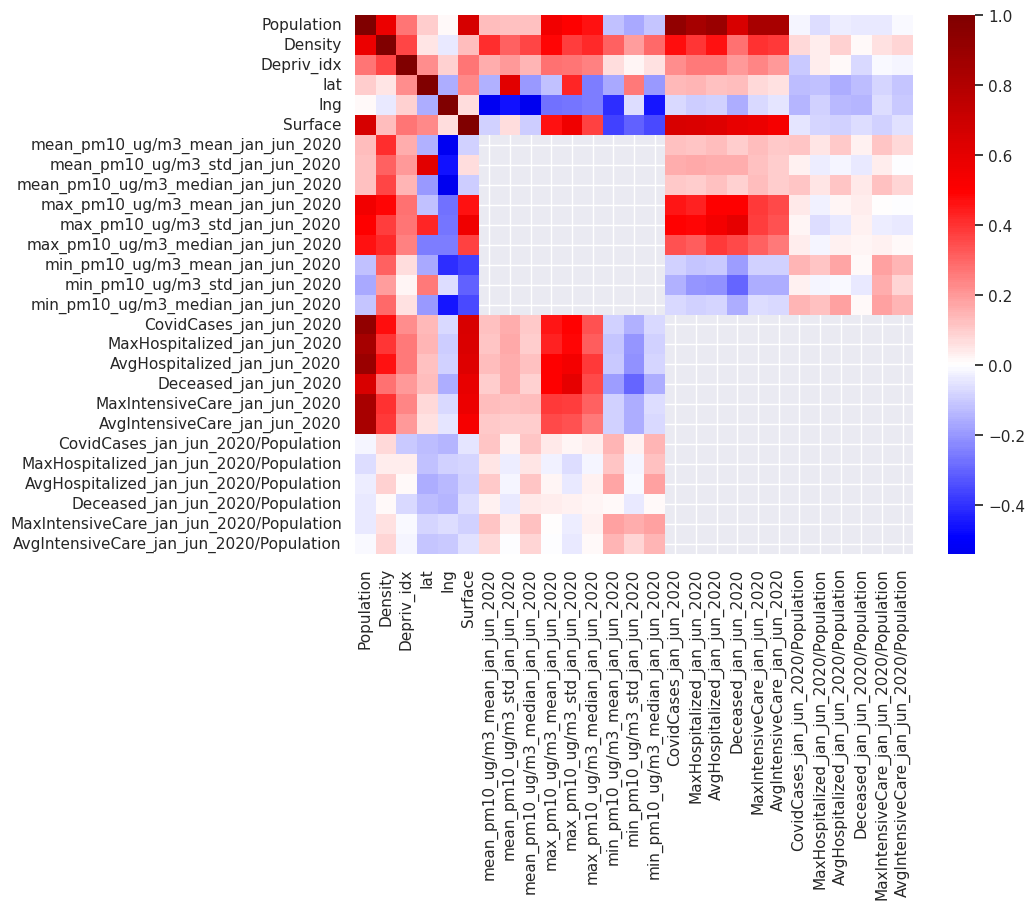

In [36]:
sns.set (rc = {'figure.figsize':(9, 7)})
ax = sns.heatmap(
    corr,
    mask=mask, #commentare questa riga per togliere la maschera
    cmap="seismic",
    center=0
)

plt.show()

### Maps plot 

#### Mappa interattiva

Si mette a disposizione un grafico su mappa interattivo sul quale si può scegliere quale feature quantitativa visualizzare tramite un apposito selettore _dropdown_.

Per costruire la mappa si è usata la libreria `folium` (vedi [qui](https://realpython.com/python-folium-web-maps-from-data/)) e un [GeoJSON pubblico dell'umbria](https://github.com/openpolis/geojson-italy/blob/d875e7c13a74727f584a5916bf83a2c4891756f5/geojson/limits_R_10_municipalities.geojson).  

In [37]:
import geopandas as gpd
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # ci sono dei FutureWarning che possiamo ignorare

# Carichiamo il file GeoJSON
geojson_path = f"{workdir}data/limits_R_10_municipalities.geojson"
gdf = gpd.read_file(geojson_path)
gdf.columns

Index(['name', 'op_id', 'minint_elettorale', 'minint_finloc', 'prov_name',
       'prov_istat_code', 'prov_istat_code_num', 'prov_acr', 'reg_name',
       'reg_istat_code', 'reg_istat_code_num', 'opdm_id', 'com_catasto_code',
       'com_istat_code', 'com_istat_code_num', 'geometry'],
      dtype='object')

Si la colonna `name` costituita da nomi di comuni formattati allo stesso modo della property `name` del GeoJSON.

In [38]:
df["name"]=df["City"].apply(
    lambda x: x.replace(
        "dell_","dell'"
    ).replace(
        "Citta","Città"
    ).replace(
        "Sant_","Sant'"
    ).replace(
        "d_","d'"
    ).replace(
        "_"," "
    )
)

Si verifica se si è riusciti nell'intento, ovvero se le due colonne coincidono:

In [39]:
df["name"].sort_values().reset_index(drop=True).equals(gdf["name"].sort_values().reset_index(drop=True))

True

Si crea una mappa centrata su Perugia, alla quale verranno aggiunte le sagome dei comuni umbri.

In [40]:
perugia=df.loc[df["name"]=="Perugia"]
m = folium.Map(location=[perugia.lat, perugia.lng], zoom_start=8)

In [41]:
def build_choropleth_updater(start_map, geo_data, data, key_col, key_on, tooltip_features=[], zoom_start=8, **kwargs):
    """ Restituisce un callable che viene chiamato ad ogni update di un folium.Choropleth
            Vanno specificati obbligatoriamente:
                start_map: (folium.Map) - una mappa con location specificata
                geo_data: (geopandas.GeoDataFrame) - il dataframe dei dati geografici
                data: (pandas.DataFrame) - il dataframe dei dati
                key_col: (string) - colonna in comune tra geo_data e data
                key_on: (string) – Variable in the geo_data GeoJSON file to bind the data to. Must start with ‘feature’ and be in JavaScript objection notation. Ex: ‘feature.id’ or ‘feature.properties.statename’.
            Eventualmente si può specificare:
                tooltip_features: (list, default []) - feature del dataframe data da visualizzare nel tooltip
                zoom_start: (int, default 8) - zoom di partenza dela mappa
                kwargs addizionali da passare a folium.Choropleth
    """
    def change_map_choropleth(color_col, **interactive_kwargs):
        
        columns=[key_col,color_col]
        
        # New Map (to delete all eventual choropleths)
        folium_map = folium.Map(location=start_map.location, zoom_start=zoom_start)
            
        # Add GeoJSON data to the map and style based on key_col
        choropleth=folium.Choropleth(
            geo_data=geo_data,
            data=data,
            columns=columns,
            key_on=key_on,
            name=color_col,
            legend_name=color_col,
            **kwargs,
            **interactive_kwargs
        )
        
        # Add Choropleth to the map
        choropleth.add_to(folium_map)

        # looping thru the GeoJSON object and adding a new property each tooltip_feature and assigning a value from data
        display_f=tuple(set(columns+tooltip_features))
        for tooltip_f in display_f:
            for f in choropleth.geojson.data['features']:
                f['properties'][tooltip_f] = str(data.loc[data[columns[0]]==f['properties'][columns[0]]].iloc[0][tooltip_f])

        # and finally adding a tooltip/hover to the choropleth's geojson
        folium.GeoJsonTooltip(display_f).add_to(choropleth.geojson)
        
        # Display the map
        display(folium_map)
        
    return change_map_choropleth

Definita la funzione `change_map_choropleth` da eseguire ad ogni _update_, si dichiarano le feature da mostrare nel tooltip:

In [42]:
tooltip_features=['Population','CovidCases_jan_jun_2020','Deceased_jan_jun_2020' ]

Infine si definiscono e visualizzano gli _widget_ :

In [43]:
map_color_dropdown = widgets.Dropdown(
    options=df.drop(["name", "City", "Zone"],axis=1).columns,
    description='Colonna da visualizzare:',
    value="Deceased_jan_jun_2020/Population",
    **style_kwargs
)

map_output = widgets.interactive_output(
    build_choropleth_updater(
        start_map=m,
        geo_data=gdf,
        data=df,
        key_col="name",
        key_on='feature.properties.name',
        tooltip_features=tooltip_features,
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        highlight=True,
        smooth_factor=0.5,
        overlay=True
    ), 
    { 'color_col': map_color_dropdown }
)

display(map_color_dropdown, map_output)

Dropdown(description='Colonna da visualizzare:', index=24, layout=Layout(width='auto'), options=('Population',…

Output()

#### Mappa semplice

Si realizzano anche due mappe non interattive di più facile implementazione, sulle quali si rappresentano rispettivamente le _feature_ `Density` e `Deceased_jan_jun_2020`

In [44]:
def add_choropleth_to_map(folium_map, geo_data, data, columns, key_on, tooltip_features=[], **kwargs):
    """ Aggiunge un folium.Choropleth ad una folium.Map (folium_map)
        Vanno specificati obbligatoriamente:
            folium_map: (folium.Map) - la mappa alla quale aggiungere il folium.Choropleth
            geo_data: (geopandas.GeoDataFrame) - il dataframe dei dati geografici
            data: (pandas.DataFrame) - il dataframe dei dati
            columns: (list) - lista contenente la colonna in comune tra geo_data e data e la colonna da visualizzare
            key_on: (string) – Variable in the geo_data GeoJSON file to bind the data to. Must start with ‘feature’ and be in JavaScript objection notation. Ex: ‘feature.id’ or ‘feature.properties.statename’.
        Eventualmente si può specificare:
            tooltip_features: (list, default []) - feature del dataframe data da visualizzare nel tooltip
            kwargs addizionali da passare a folium.Choropleth
    """
    choropleth=folium.Choropleth(
        geo_data=geo_data,
        data=data,
        columns=columns,
        key_on=key_on,
        **kwargs
    )
    choropleth.add_to(folium_map)
    
    # looping thru the geojson object and adding a new property each tooltip_feature and assigning a value from data
    display_f=tuple(set(columns+tooltip_features))
    for tooltip_f in display_f:
        for f in choropleth.geojson.data['features']:
            f['properties'][tooltip_f] = str(data.loc[data[columns[0]]==f['properties'][columns[0]]].iloc[0][tooltip_f])

    # and finally adding a tooltip/hover to the choropleth's geojson
    folium.GeoJsonTooltip(display_f).add_to(choropleth.geojson)

    folium.LayerControl().add_to(folium_map)
    
    return folium_map

##### Mappa `Density`

In [45]:
m1 = folium.Map(location=[perugia.lat, perugia.lng], zoom_start=8)

add_choropleth_to_map(
    folium_map=m1,
    geo_data=gdf,
    data=df,
    columns=['name', 'Density'],
    key_on='feature.properties.name',
    tooltip_features=['name','Density','Surface','Population'],
    name='Density',
    legend_name='Density',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    smooth_factor=0.5,
)

##### Mappa `Deceased_jan_jun_2020`

In [46]:
m2 = folium.Map(location=[perugia.lat, perugia.lng], zoom_start=8)

add_choropleth_to_map(
    folium_map=m2,
    geo_data=gdf,
    data=df,
    columns=['name', 'Deceased_jan_jun_2020'],
    key_on='feature.properties.name',
    tooltip_features=['name','Deceased_jan_jun_2020','CovidCases_jan_jun_2020','AvgHospitalized_jan_jun_2020', 'AvgIntensiveCare_jan_jun_2020'],
    name='Deceased_jan_jun_2020',
    legend_name='Deceased_jan_jun_2020',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight=True,
    smooth_factor=0.5
)

## Modeling

Elaborazione di modelli.

In un primo momento si affronta la fase di apprendimento non supervisionato, consistente nel _clustering_ dei dati utile ad una comprensione più profonda; 
Successivamente si elaborano e valutano modelli di regressione su un insieme limitato di _feature_.

### Unsupervised Learning

Si utilizza l'algoritmo _K-means_ per creare dei _cluster_ partendo da un numero pari a 2 fino ad un massimo di 18. Si considera solo una selezione delle _feature_:

In [47]:
from sklearn.cluster import KMeans

X = df.loc[:, [
    'Depriv_idx',
    'CovidCases_jan_jun_2020/Population',
    'MaxHospitalized_jan_jun_2020/Population',
    'AvgHospitalized_jan_jun_2020/Population',
    'Deceased_jan_jun_2020/Population',
    'MaxIntensiveCare_jan_jun_2020/Population',
    'AvgIntensiveCare_jan_jun_2020/Population',
    'max_pm10_ug/m3_mean_jan_jun_2020',  
    'max_pm10_ug/m3_std_jan_jun_2020', 
    'max_pm10_ug/m3_median_jan_jun_2020',
    'mean_pm10_ug/m3_mean_jan_jun_2020',
    'mean_pm10_ug/m3_std_jan_jun_2020',
    'mean_pm10_ug/m3_median_jan_jun_2020',
    'min_pm10_ug/m3_mean_jan_jun_2020',
    'min_pm10_ug/m3_std_jan_jun_2020',
    'min_pm10_ug/m3_median_jan_jun_2020'
]]

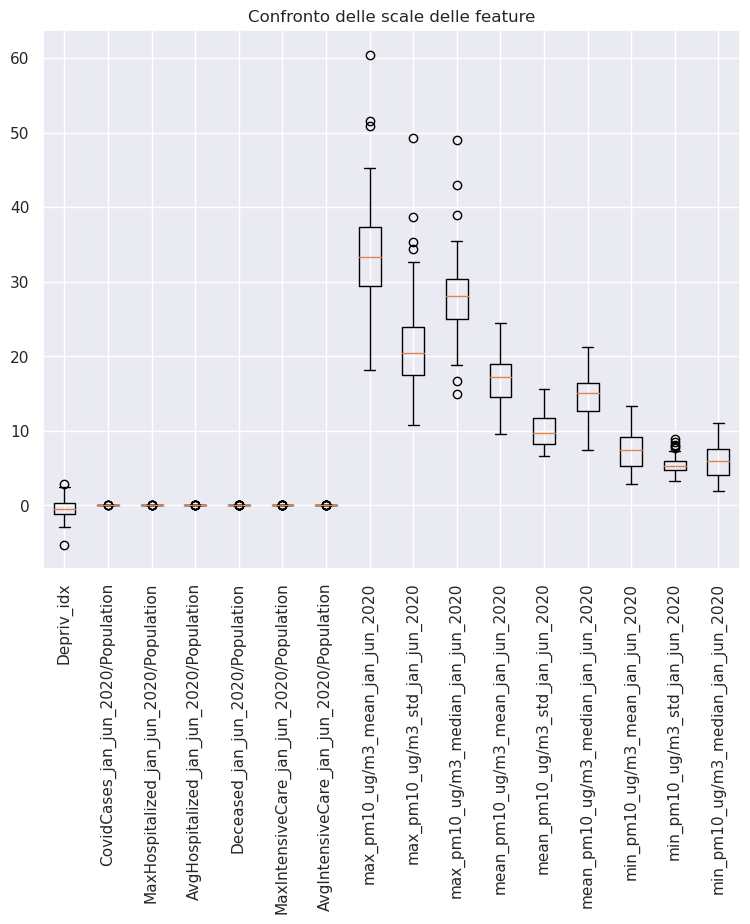

In [48]:
plt.boxplot(X,labels=X.columns)
plt.title('Confronto delle scale delle feature')
plt.xticks(rotation=90)
plt.show()

#### Scaling
L'algoritmo _K-means_ è sensibile alla scala dei dati perché computa la distanza nello spazio delle _feature_; come appena mostrato, i dati sono distribuiti su scale diverse, pertanto si decide di effettuare lo _scaling_ dei dati.

Tra i metodi per lo _scaling_ della libreria `sklearn`, si selezionano `sklearn.preprocessing.MinMaxScaler` e `sklearn.preprocessing.StandardScaler`.
Per scegliere quale dei due utilizzare, si confrontano tra loro:

##### MinMaxScaler

Si scalano i dati in un intervallo da 0 a 1.

In [49]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

x = X.values #returns a numpy array
x_scaled = min_max_scaler.fit_transform(x)
minmax_X = pd.DataFrame(x_scaled, index=X.index, columns=X.columns)

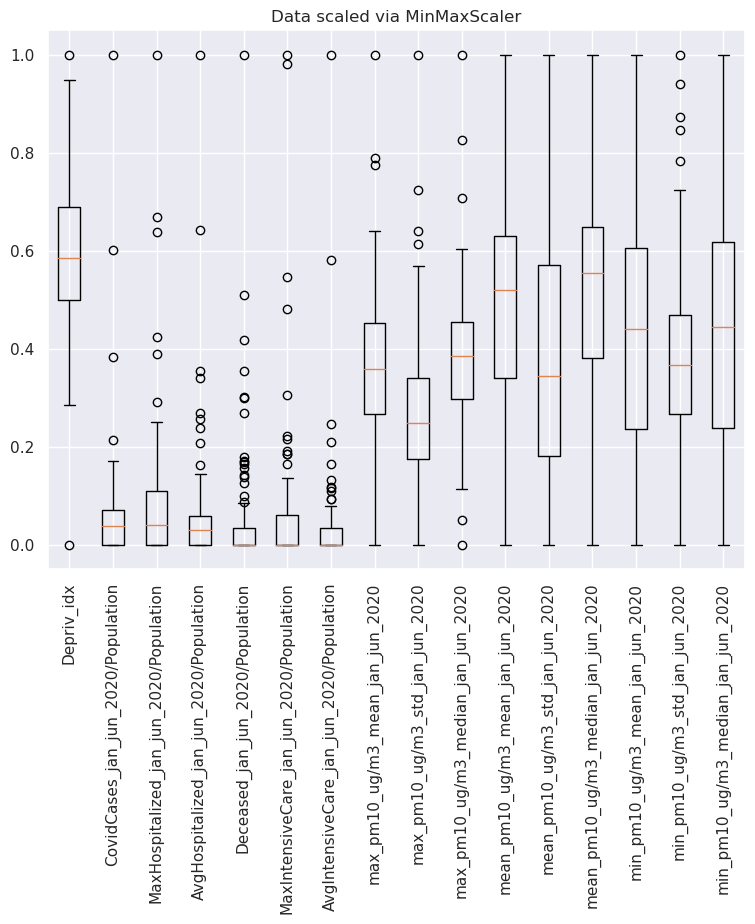

In [50]:
plt.boxplot(minmax_X, labels=minmax_X.columns)
plt.title('Data scaled via MinMaxScaler')
plt.xticks(rotation=90)
plt.show()

Si nota la cospicua presenza di _outliers_ nelle _feature_ epidemiologiche. Per questa tipologia di _scaler_ la presenza anche di un solo _outlier_ in una _feature_ può comportare l'eccessiva compressione dei dati della stessa, inficiando l'applicazione dell'algoritmo _k-means_.

##### StandardScaler

Dalla [documentazione ufficiale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler):
> Standardize features by removing the mean and scaling to unit variance.
> 
> The standard score of a sample x is calculated as:
> 
> z = (x - u) / s
> 
> where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Si decide di applicare `StandardScaler(with_mean=False)` alle variabili di conteggio, e `StandardScaler(with_mean=True)` alle altre:

In [51]:
from sklearn.preprocessing import StandardScaler

count_features=[    
    'Depriv_idx',
    'CovidCases_jan_jun_2020/Population',
    'MaxHospitalized_jan_jun_2020/Population',
    'AvgHospitalized_jan_jun_2020/Population',
    'Deceased_jan_jun_2020/Population',
    'MaxIntensiveCare_jan_jun_2020/Population',
    'AvgIntensiveCare_jan_jun_2020/Population',
]

X_no_count=X.drop(count_features, axis=1)
X_count=X[count_features]
    
std_scaler = StandardScaler()
std_scaler_count = StandardScaler(with_mean=False)

x_scaled_count = std_scaler_count.fit_transform(X_count.values)
x_scaled = std_scaler.fit_transform(X_no_count)

std_X = pd.DataFrame(x_scaled_count, index=X.index, columns=count_features).join(pd.DataFrame(x_scaled, index=X.index, columns=X_no_count.columns))

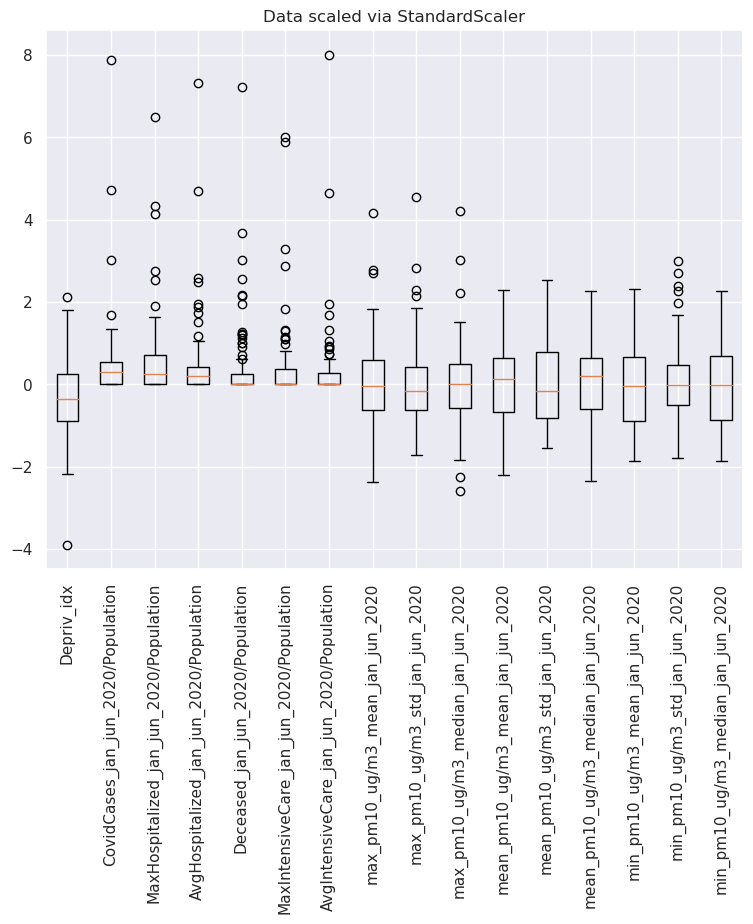

In [52]:
plt.boxplot(std_X, labels=std_X.columns)
plt.title('Data scaled via StandardScaler')
plt.xticks(rotation=90)
plt.show()

#### K-Means clustering

Si procede con la clusterizzazione.

Si sceglie di utilizzare i dati scalati tramite il metodo `StandardScaler` a causa del miglior trattamento delle variabili di conteggio.

In [53]:
# Create cluster feature
clusters_cols=[]
inertias=[]

cluster_range = range(2,19)
for n_clusters in cluster_range:
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=22,
        n_init=20
    )
    col_name=f"cluster_of_{n_clusters}"
    df[col_name] = kmeans.fit_predict(std_X) 
    df[col_name] = df[col_name].astype("category")
    
    clusters_cols.append(col_name)
    inertias.append(kmeans.inertia_)

df.loc[:,clusters_cols].head()

cluster_of_2 cluster_of_3 cluster_of_4 cluster_of_5 cluster_of_6   
0            0            0            3            0            5  \
1            0            2            1            3            5   
2            0            0            3            2            2   
3            0            0            3            0            5   
4            0            2            1            1            4   

  cluster_of_7 cluster_of_8 cluster_of_9 cluster_of_10 cluster_of_11   
0            0            7            0             2             3  \
1            0            7            5             2             3   
2            1            1            0             1             6   
3            1            7            0             2             4   
4            0            7            2             2             3   

  cluster_of_12 cluster_of_13 cluster_of_14 cluster_of_15 cluster_of_16   
0             9             7             2            10            15  \
1             5             7             2             8            11   
2             1             9             0             0             9   
3             4             1             3            13            15   
4             5             4             2             8            11   

  cluster_of_17 cluster_of_18  
0            16             5  
1            16            12  
2             1             1  
3             1             4  
4            15            12

##### Grafico dell'_inertia_  al variare del numero di _cluster_

L'_inertia_ è una misura della dispersione dei punti all'interno di ciascun _cluster_; rappresenta quanto i punti in un _cluster_ sono vicini al suo centroide. Più bassa è l'_inertia_, meglio è.
Tuttavia all'aumentare del numero di _cluster_ è più complicato interpretare i risultati.
Per capire quanti _cluster_ sono necessari per raggruppare i dati in modo significativo, si può far riferimento all' **analisi del gomito** (_elbow analysis_):

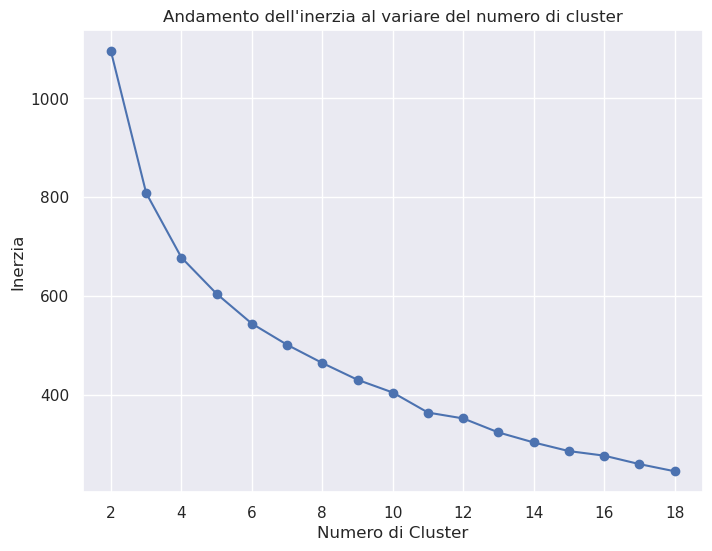

In [54]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='-')
plt.title('Andamento dell\'inerzia al variare del numero di cluster')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inerzia')
plt.grid(True)
plt.show()

Il punto in cui l'inerzia inizia a diminuire in modo meno significativo, creando una sorta di "gomito" nel grafico, si può individuare tra i 3 e i 5 _cluster_

##### `catplot` interattivo per diverse clusterizzazioni

In [55]:
def build_catplot_updater(dataframe, title='Interactive seaborn catplot', **kwargs):
    """ Restituisce un callable che viene chiamato ad ogni update di un seaborn.catplot plot. 
            Va specificato obbligatoriamente:
                (pd.DataFrame) dataframe: il pd.DataFrame dei dati
            Eventualmente si può specificare:
                (str) title: il titolo del grafico
                kwargs addizionali da passare a plotly.express.scatter
    """
    def catplot_updater(x_feature, y_feature):
        sns.catplot(
            x=x_feature, 
            y=y_feature, 
            data=dataframe,
            **kwargs
        );
        
    return catplot_updater

In [56]:
x_dropdown = widgets.Dropdown(
    options=X.columns, # si decide di rappresentare i valori non scalati sull'asse delle x
    description='Target [asse x]:',
    value='CovidCases_jan_jun_2020/Population',
    **style_kwargs
)
y_dropdown = widgets.Dropdown(
    options=clusters_cols,
    description='Clusterizzazione [asse y]:',
    **style_kwargs
)

In [57]:
output = widgets.interactive_output(
    build_catplot_updater(
        df,
        kind="boxen"
    ), 
    { 'x_feature': x_dropdown, 'y_feature': y_dropdown}
)

display(x_dropdown, y_dropdown, output)

Dropdown(description='Target [asse x]:', index=1, layout=Layout(width='auto'), options=('Depriv_idx', 'CovidCa…

Dropdown(description='Clusterizzazione [asse y]:', layout=Layout(width='auto'), options=('cluster_of_2', 'clus…

Output()

Selezionando la clusterizzazione in 3 _cluster_, e osservando le _feature_ `CovidCases_jan_jun_2020/Population` e `mean_pm10_ug/m3_mean_jan_jun_2020`, si nota una buona separazione del campione: <a id='3-cluster'></a>

In [58]:
df.groupby("cluster_of_3")[["CovidCases_jan_jun_2020/Population","mean_pm10_ug/m3_mean_jan_jun_2020"]].agg(
    {
        'CovidCases_jan_jun_2020/Population':['mean','std'],
        'mean_pm10_ug/m3_mean_jan_jun_2020': ['mean','std']
    }, 
)

CovidCases_jan_jun_2020/Population             
                                           mean       std   
cluster_of_3                                                
0                                      0.001301  0.001124  \
1                                      0.020927  0.007383   
2                                      0.001255  0.002110   

             mean_pm10_ug/m3_mean_jan_jun_2020            
                                          mean       std  
cluster_of_3                                              
0                                    18.568944  2.133692  
1                                    19.071582  5.089146  
2                                    13.309281  2.247263

In questa clusterizzazione si nota che, in media, i cluster 0 e 1 presentano valori di polveri sottili più alti.

D'altra parte, come succede in tutte e 17 clusterizzazioni, si distingue un _cluster_ (in questo caso denominato 1) con alta diffusione del COVID-19:

In [59]:
df.loc[df["cluster_of_3"]==1]

Population  Density  Depriv_idx    City       lat        lng  Surface   
35        1874    124.0   -2.708541   Giove  42.50988  12.330150    15.09  \
70        1910    140.0   -0.218317  Porano  42.68171  12.102061    13.60   

                   Zone  mean_pm10_ug/m3_mean_jan_jun_2020   
35  collinare e montana                          22.670151  \
70  collinare e montana                          15.473012   

    mean_pm10_ug/m3_std_jan_jun_2020  ...  cluster_of_9  cluster_of_10   
35                         11.639829  ...             1              4  \
70                          8.244405  ...             6              3   

    cluster_of_11  cluster_of_12  cluster_of_13  cluster_of_14  cluster_of_15   
35              2              2              2              4              1  \
70              5              6              5              5              4   

    cluster_of_16  cluster_of_17  cluster_of_18  
35              6              7              6  
70              2              2             10  

[2 rows x 47 columns]

Queste due _entries_ corrispondono ai comuni di **Giove** e **Porano**.

##### Visualizzazione su mappa

In [60]:
m_c = folium.Map(location=[perugia.lat, perugia.lng], zoom_start=8)

n_clusters_dropdown = widgets.Dropdown(
    options=clusters_cols,
    description='Clusterization:',
    **style_kwargs
)

clusters_map_output = widgets.interactive_output(
    build_choropleth_updater(
        start_map=m_c,
        geo_data=gdf,
        data=df,
        key_col="name",
        key_on='feature.properties.name',
        tooltip_features=["Zone"],
        fill_color='PuBuGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        highlight=True,
        smooth_factor=0.5,
        bins=18
    ), 
    { 'color_col': n_clusters_dropdown}
)

display(n_clusters_dropdown, clusters_map_output)

Dropdown(description='Clusterization:', layout=Layout(width='auto'), options=('cluster_of_2', 'cluster_of_3', …

Output()

#### K-Means clustering con PCA
Si effettua lo stesso studio, ma utilizzando le componenti principali anzichè le feature pure, in modo tale da avere rappresentazioni basso-dimensionali contenenti più informazione possibile.

##### PCA

Si ruota lo spazio delle _feature_ tramite la _Principal Component Analysis_.

Per farlo lo spazio delle feature deve essere scalato con devizione standard unitaria. Si utilizza pertanto il _dataframe_ `std_X` sul quale abbiamo già applicato lo `StandardScaler`:

In [61]:
from sklearn.decomposition import PCA

pca = PCA()
scores=pca.fit_transform(std_X)

In [62]:
pcadf=pd.DataFrame(pca.components_)
pcadf.head()

0         1         2         3         4         5         6    
0  0.061024  0.279082  0.264167  0.296689  0.237961  0.296533  0.288845  \
1 -0.107180  0.277805  0.305312  0.303276  0.291610  0.284668  0.305905   
2  0.187879  0.051859  0.044012  0.044979  0.112612  0.003756  0.027300   
3  0.289115  0.013328  0.002142 -0.021010  0.006436  0.073608  0.039524   
4 -0.902999  0.133835 -0.135792 -0.098404  0.108311  0.015683 -0.013231   

         7         8         9         10        11        12        13   
0  0.208014  0.103371  0.215221  0.317769  0.192324  0.313287  0.289620  \
1 -0.254942 -0.176422 -0.250376 -0.289084 -0.230119 -0.279556 -0.195254   
2  0.419413  0.459532  0.335423 -0.032382  0.008976 -0.026366 -0.375549   
3 -0.148347  0.422075 -0.317059 -0.139896  0.609814 -0.226747 -0.071505   
4  0.047411  0.235641 -0.019653  0.039790  0.235716  0.017564 -0.077591   

         14        15  
0  0.155352  0.296966  
1 -0.120634 -0.200835  
2 -0.432012 -0.339896  
3  0.381951 -0.119279  
4  0.026661 -0.063722

Per poter ridurre la dimensionalità dello spazio delle _feature_, si può osservare la proporzione di varianza spiegata dalle componenti principali (nominate in ordine rispetto alla varianza spiegata).

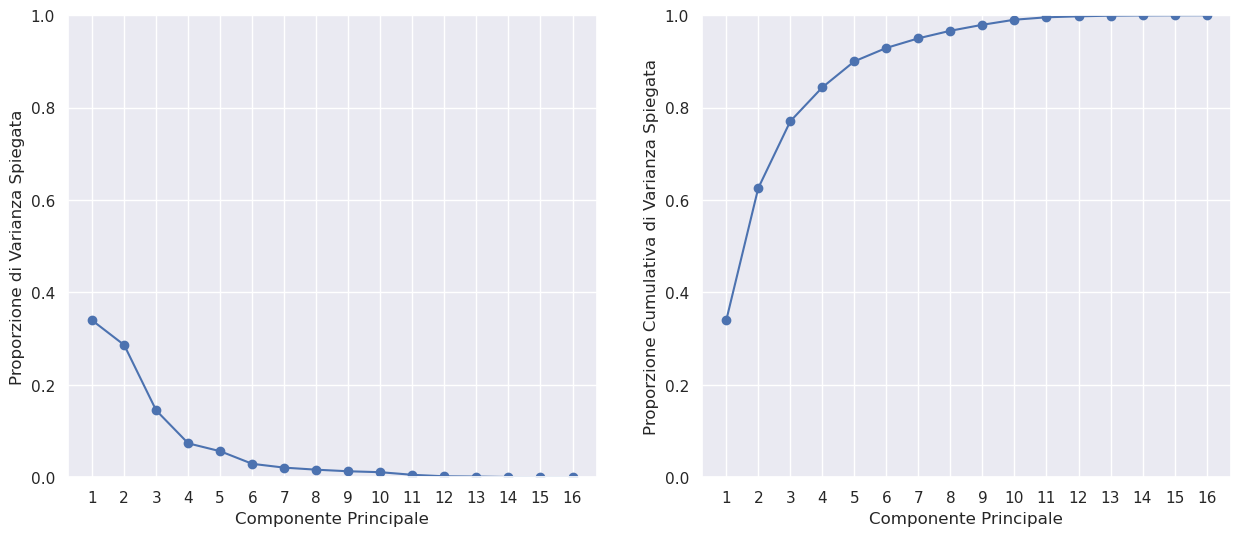

In [63]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
ticks=np.arange(pca.n_components_)+1
ax=axes[0]
ax.plot(
    ticks,
    pca.explained_variance_ratio_,
    marker='o'
)
ax.set_xlabel('Componente Principale')
ax.set_ylabel('Proporzione di Varianza Spiegata')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(
    ticks,
    pca.explained_variance_ratio_.cumsum(),
    marker='o'
)
ax.set_xlabel('Componente Principale')
ax.set_ylabel('Proporzione Cumulativa di Varianza Spiegata')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig.show()

Si decide di considerare le prime 3 componenti principali, perchè si ha un buon compromesso tra la dimensionalità dello spazio delle _feature_ (3 dimensioni sono agevolmente rapresentabili) e la Proporzione Cumulativa di Varianza Spiegata (circa 80%).

In [64]:
trunc_pca = PCA(n_components=3)

# Fit e trasforma i dati
data_pca_array = trunc_pca.fit_transform(std_X)
data_pca = pd.DataFrame(data_pca_array)
data_pca

0         1         2
0  -0.361109  0.040502  0.255089
1  -1.092519  0.717461  1.445612
2   1.951770 -1.869942 -0.449171
3  -0.108581 -0.956980  0.169532
4  -1.193370  2.018213  1.643515
..       ...       ...       ...
87  0.464863 -1.977728 -0.478767
88  1.033490 -1.427137  1.509575
89  0.603059  0.406943 -0.264534
90 -3.126544  1.474443 -0.332803
91 -1.934653  0.483400 -0.626477

[92 rows x 3 columns]

Si rappresentano in un'_heatmap_ i coefficienti (_loadings_) delle componenti principali:

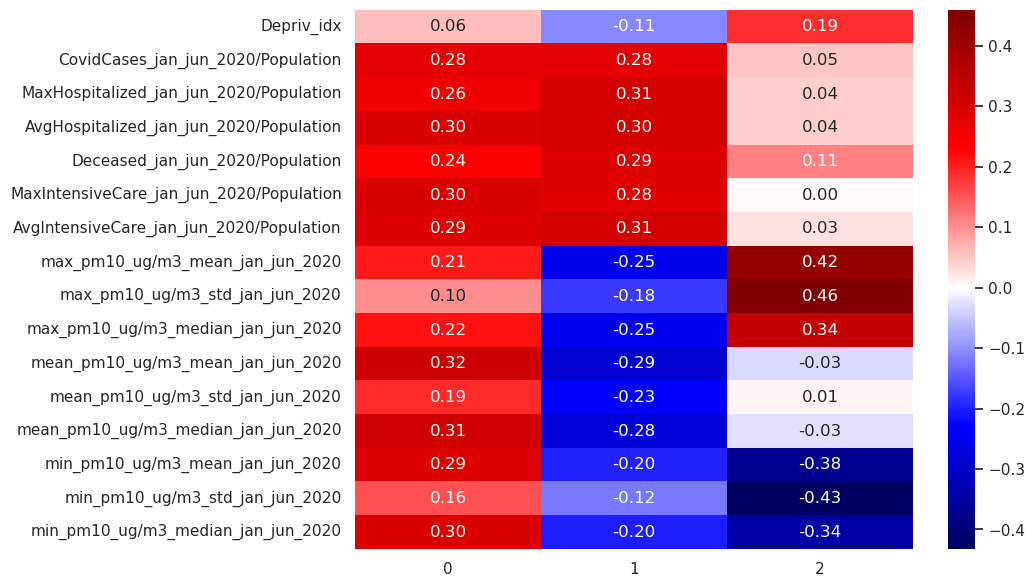

In [65]:
ax = sns.heatmap(
    trunc_pca.components_.T,
    yticklabels=std_X.columns,
    annot=True, 
    fmt='.2f', 
    cmap="seismic",
    center=0
)

A questo punto si può procedere con la clusterizzazione

In [66]:
clusters_cols=[]
inertias=[]

cluster_range = range(2,19)
for n_clusters in cluster_range:
    kmeans = KMeans(
        n_clusters=n_clusters,
        random_state=22,
        n_init=20
    )
    col_name=f"PCA_cluster_of_{n_clusters}"
    df[col_name] = kmeans.fit_predict(data_pca)
    df[col_name] = df[col_name].astype("category")
    clusters_cols.append(col_name)
    inertias.append(kmeans.inertia_)

df.loc[:,clusters_cols].head()

PCA_cluster_of_2 PCA_cluster_of_3 PCA_cluster_of_4 PCA_cluster_of_5   
0                0                1                1                0  \
1                0                0                3                2   
2                0                1                1                4   
3                0                1                1                0   
4                0                0                0                3   

  PCA_cluster_of_6 PCA_cluster_of_7 PCA_cluster_of_8 PCA_cluster_of_9   
0                2                3                1                3  \
1                0                3                0                3   
2                5                0                7                1   
3                2                0                7                1   
4                3                3                0                3   

  PCA_cluster_of_10 PCA_cluster_of_11 PCA_cluster_of_12 PCA_cluster_of_13   
0                 2                 9                10                 3  \
1                 2                 9                10                 3   
2                 7                 2                 5                 8   
3                 7                 2                 7                 8   
4                 2                 9                 0                 3   

  PCA_cluster_of_14 PCA_cluster_of_15 PCA_cluster_of_16 PCA_cluster_of_17   
0                 1                 6                 0                 1  \
1                10                 6                 0                13   
2                 0                 1                11                 0   
3                12                 1                 3                11   
4                10                14                 9                13   

  PCA_cluster_of_18  
0                 9  
1                 9  
2                 0  
3                 0  
4                13

Si rappresenta l'andamento dell'_inertia_ al variare del numero di cluster:

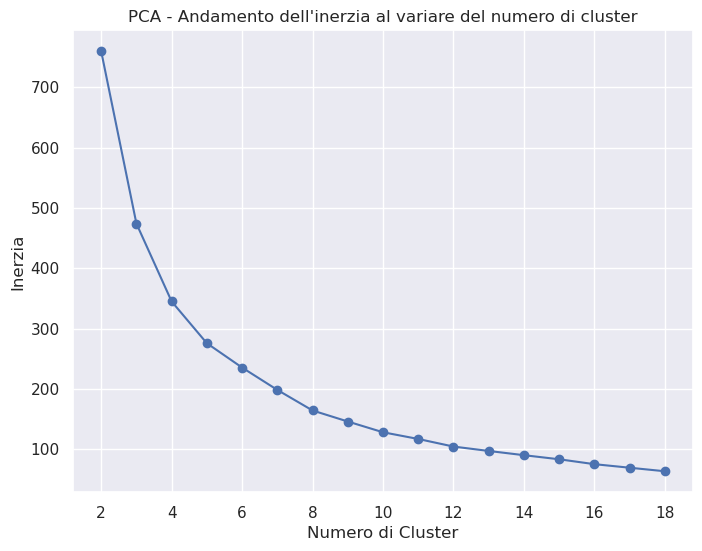

In [67]:
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='-')
plt.title('PCA - Andamento dell\'inerzia al variare del numero di cluster')
plt.xlabel('Numero di Cluster')
plt.ylabel('Inerzia')
plt.grid(True)
plt.show()

Si nota che l'_inertia_ delle clusterizzazioni è sensibilmente ridotta rispetto all'applicazione dell'algoritmo _k-means_ sulle _feature_ originali. Questo indica che nello spazio delle componenti principali si ha una miglior clusterizzazione.
Tuttavia non è detto che, tornando allo spazio delle _feature_ originali si abbia una diversa clusterizzazione.

Anche in questo caso, il numero di _cluster_ che si ritiene più adatto, supportato dall' _elbow analysis_ è compreso tra 3 e 5. 
tuttavia se si va a confrontare la clusterizzazione PCA in 3 _cluster_ con quella (sempre a 3 cluster) nello spazio delle _feature_, ci si accorge che la suddivisione è identica. 
Infatti, semplicemente rinominando:

In [68]:
df.loc[df["PCA_cluster_of_3"].replace(0,"a").replace(1,"b").replace(2,"c")!=df["cluster_of_3"].replace(0,"b").replace(1,"c").replace(2,"a")]

Empty DataFrame
Columns: [Population, Density, Depriv_idx, City, lat, lng, Surface, Zone, mean_pm10_ug/m3_mean_jan_jun_2020, mean_pm10_ug/m3_std_jan_jun_2020, mean_pm10_ug/m3_median_jan_jun_2020, max_pm10_ug/m3_mean_jan_jun_2020, max_pm10_ug/m3_std_jan_jun_2020, max_pm10_ug/m3_median_jan_jun_2020, min_pm10_ug/m3_mean_jan_jun_2020, min_pm10_ug/m3_std_jan_jun_2020, min_pm10_ug/m3_median_jan_jun_2020, CovidCases_jan_jun_2020, MaxHospitalized_jan_jun_2020, AvgHospitalized_jan_jun_2020, Deceased_jan_jun_2020, MaxIntensiveCare_jan_jun_2020, AvgIntensiveCare_jan_jun_2020, CovidCases_jan_jun_2020/Population, MaxHospitalized_jan_jun_2020/Population, AvgHospitalized_jan_jun_2020/Population, Deceased_jan_jun_2020/Population, MaxIntensiveCare_jan_jun_2020/Population, AvgIntensiveCare_jan_jun_2020/Population, name, cluster_of_2, cluster_of_3, cluster_of_4, cluster_of_5, cluster_of_6, cluster_of_7, cluster_of_8, cluster_of_9, cluster_of_10, cluster_of_11, cluster_of_12, cluster_of_13, cluster_of_14, cluster_of_15, cluster_of_16, cluster_of_17, cluster_of_18, PCA_cluster_of_2, PCA_cluster_of_3, PCA_cluster_of_4, PCA_cluster_of_5, PCA_cluster_of_6, PCA_cluster_of_7, PCA_cluster_of_8, PCA_cluster_of_9, PCA_cluster_of_10, PCA_cluster_of_11, PCA_cluster_of_12, PCA_cluster_of_13, PCA_cluster_of_14, PCA_cluster_of_15, PCA_cluster_of_16, PCA_cluster_of_17, PCA_cluster_of_18]
Index: []

[0 rows x 64 columns]

Uniamo i _dataframe_ per poter rappresentare il risultato della clusterizzazione:

In [69]:
data_pca=df.join(data_pca)

##### `catplot` interattivo per diverse clusterizzazioni

In [70]:
x_dropdown = widgets.Dropdown(
    options=[0,1,2],
    description='Componente Principale [asse x]:',
    **style_kwargs
)
y_dropdown = widgets.Dropdown(
    options=clusters_cols,
    description='Clusterizzazione [asse y]:',
    **style_kwargs
)

In [71]:
output = widgets.interactive_output(
    build_catplot_updater(
        data_pca,
        kind="boxen"
    ), 
    { 'x_feature': x_dropdown, 'y_feature': y_dropdown}
)

display(x_dropdown, y_dropdown, output)

Dropdown(description='Componente Principale [asse x]:', layout=Layout(width='auto'), options=(0, 1, 2), style=…

Dropdown(description='Clusterizzazione [asse y]:', layout=Layout(width='auto'), options=('PCA_cluster_of_2', '…

Output()

##### Visualizzazione su mappa

In [72]:
m_pca = folium.Map(location=[perugia.lat, perugia.lng], zoom_start=8)

n_clusters_dropdown = widgets.Dropdown(
    options=clusters_cols,
    description='Clusterization:',
    **style_kwargs
)

clusters_map_output = widgets.interactive_output(
    build_choropleth_updater(
        start_map=m_pca,
        geo_data=gdf,
        data=df,
        key_col="name",
        key_on='feature.properties.name',
        tooltip_features=["Zone"],
        fill_color='PuBuGn',
        fill_opacity=0.7,
        line_opacity=0.2,
        highlight=True,
        smooth_factor=0.5,
        bins=18
    ), 
    { 'color_col': n_clusters_dropdown}
)

display(n_clusters_dropdown, clusters_map_output)

Dropdown(description='Clusterization:', layout=Layout(width='auto'), options=('PCA_cluster_of_2', 'PCA_cluster…

Output()

##### Visualizzazione dei cluster sulle componenti principali

In [73]:
x_dropdown_3d = widgets.Dropdown(
    options=[0,1,2],
    description='asse x:',
    value=0,
    **style_kwargs
)
y_dropdown_3d = widgets.Dropdown(
    options=[0,1,2],
    description='asse y:',
    value=1,
    **style_kwargs
)
z_dropdown_3d = widgets.Dropdown(
    options=[0,1,2],
    description='asse z:',
    value=2,
    **style_kwargs
)
color_dropdown_3d = widgets.Dropdown(
    options=clusters_cols,
    description='color:',
    **style_kwargs
)

In [74]:
output_3d = widgets.interactive_output(
    build_scatter_3d_updater(
        data_pca, 
        title="Clusters sullo spazio delle componenti principali",
        hover_name="City",
        width=1000,
        height=700
    ), 
    { 'x_feature': x_dropdown_3d, 'y_feature': y_dropdown_3d, 'z_feature':z_dropdown_3d, 'color_feature':color_dropdown_3d}
)

display(x_dropdown_3d, y_dropdown_3d, z_dropdown_3d, color_dropdown_3d, output_3d)

Dropdown(description='asse x:', layout=Layout(width='auto'), options=(0, 1, 2), style=DescriptionStyle(descrip…

Dropdown(description='asse y:', index=1, layout=Layout(width='auto'), options=(0, 1, 2), style=DescriptionStyl…

Dropdown(description='asse z:', index=2, layout=Layout(width='auto'), options=(0, 1, 2), style=DescriptionStyl…

Dropdown(description='color:', layout=Layout(width='auto'), options=('PCA_cluster_of_2', 'PCA_cluster_of_3', '…

Output()

Osservando le clusterizzazioni nello spazio delle componenti principali, risulta evidente la distanza del _cluster_ contenente Giove e Porano dagli altri dati;  Non si può affermare lo stesso per gli altri _cluster_.

Per questo motivo si preferisce tenere basso il numero di _cluster_, e si decide di addottare come ottimale la clusterizzazione in 3. Le caratteristiche dei 3 _cluster_ sono già state discusse [qui](#3-cluster)

### Supervised Learning

Si elaborano e testano dei modelli di regressione atti a predirre il il rapporto `CovidCases_jan_jun_2020/Population` a partire da un _subset_ di _feature_.

In [75]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [76]:
y_feature='CovidCases_jan_jun_2020/Population'
X_features=[
    'lat', 
    'lng', 
    'Surface',
    'mean_pm10_ug/m3_mean_jan_jun_2020',
    'mean_pm10_ug/m3_std_jan_jun_2020',
    'mean_pm10_ug/m3_median_jan_jun_2020',
]

data=df.loc[:, [y_feature]+X_features ]

y = data[y_feature]
X = data.loc[:,X_features]

#### Separazione dei campioni di train e test

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    train_size = 0.3,  
    random_state = 22                                     
)
print(len(X_train))
print(len(X_test))

27
65


#### Linear Regression

Per cominciare, si effettua un primo tentativo con un modello lineare.

##### Apprendimento

Si allena un modello lineare ai minimi quadrati.
Per lasciare maggior libertà al modello si aggiunge una costante; altrimenti l'equazione lineare risultante dal _fit_ è costretta a passare per l'origine dello spazio delle _feature_.

In [78]:
# aggiungiamo un termine costante
X_train_with_const = sm.add_constant(X_train)
X_train_with_const

# fittiamo il modello OLS (Ordinary Least Squares)
ols_model = sm.OLS(y_train, X_train_with_const).fit() # si preferisce sm.OLS invece di sklearn.linear_model.LinearRegression perchè fornisce numerosi parametri di valutazione

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     CovidCases_jan_jun_2020/Population   R-squared:                       0.286
Model:                                            OLS   Adj. R-squared:                  0.072
Method:                                 Least Squares   F-statistic:                     1.335
Date:                                Sun, 27 Aug 2023   Prob (F-statistic):              0.288
Time:                                        19:25:48   Log-Likelihood:                 150.74
No. Observations:                                  27   AIC:                            -287.5
Df Residuals:                                      20   BIC:                            -278.4
Df Model:                                           6                                         
Covariance Type:                            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.0637      0.089      0.713      0.484      -0.123       0.250
lat                                    -0.0008      0.002     -0.404      0.690      -0.005       0.003
lng                                    -0.0020      0.001     -1.636      0.117      -0.005       0.001
Surface                              4.652e-06   2.27e-06      2.051      0.054   -7.91e-08    9.38e-06
mean_pm10_ug/m3_mean_jan_jun_2020      -0.0004      0.001     -0.479      0.637      -0.002       0.001
mean_pm10_ug/m3_std_jan_jun_2020    -1.149e-05      0.000     -0.034      0.973      -0.001       0.001
mean_pm10_ug/m3_median_jan_jun_2020     0.0004      0.001      0.422      0.677      -0.001       0.002
==============================================================================
Omnibus:                        2.238   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.327   Jarque-Bera (JB):                1.446
Skew:                           0.313   Prob(JB):                        0.485
Kurtosis:                       2.055   Cond. No.                     6.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Si calcola l'errore di train:

In [79]:
y_pred=ols_model.predict(
    sm.add_constant(X_train)
)

train_RMSE=np.sqrt(mean_squared_error(y_train, y_pred))
print(f"train RMSE: {train_RMSE:.4f}")

train RMSE: 0.0009


Per capire la bontà o meno dell parametro di valutazione appena calcolato si confronta con la deviazione standard del _target_:

In [80]:
ratio=train_RMSE/y_train.std()
print(f"Rapporto train RMSE/std: {ratio:.2f}")

Rapporto train RMSE/std: 0.83


##### Validazione

Si valida il modello sul campione di test:

In [81]:
y_pred=ols_model.predict(
    sm.add_constant(X_test)
)

test_RMSE=np.sqrt(mean_squared_error(y_test, y_pred))
print(f"test RMSE: {test_RMSE:.4f}")

test RMSE: 0.0040


L'errore è salito di un ordine di grandezza; questo comportamento fa sospettare l'_overfitting_.

Ad ogni modo, si confronta come prima con la deviazione standard del _target_:

In [82]:
ratio=test_RMSE/y_test.std()
print(f"Rapporto test RMSE/std: {ratio:.2f}")

Rapporto test RMSE/std: 1.03


**In conclusione**, il modello appena elaborato non è considerato significativo; i motivi che portano a scartarlo sono:
* Il modello è poco robusto. Si è osservato un importante incremento dell'RMSE nella fase di test
* I valori del p-value (Colonna **P>|t|** del sommario in fase di train) non permettono di escludere l'ipotesi nulla per nessuno dei parametri.

#### PCR

Per tentare di migliorare l'analisi, si passa allo spazio delle componente principali per effettuare nuovamente la regressione lineare.

##### Scaling

[Come visto precedentemente](), si effettua lo scaling delle variabili

In [83]:
std_scaler = StandardScaler()

arr = X.values #returns a numpy array
arr_scaled = std_scaler.fit_transform(arr)
stddf = pd.DataFrame(arr_scaled, index=data.index, columns=X_features)

std_X = stddf.loc[:,X_features]

std_X

lat       lng   Surface  mean_pm10_ug/m3_mean_jan_jun_2020   
0  -0.756848  0.272922 -0.108526                          -0.108053  \
1  -0.316642 -1.706220 -0.098084                          -0.240528   
2  -1.131873 -0.591756 -0.711098                           1.731411   
3  -1.258186 -0.174665  0.422836                           0.477001   
4  -1.149264  1.044060 -0.532132                          -0.920344   
..       ...       ...       ...                                ...   
87  1.121377 -1.355669 -0.377078                           0.708007   
88  1.481192 -0.451323  1.136295                           0.182981   
89  0.946728  0.460846  0.003093                          -0.230706   
90 -0.525751  1.368148 -0.582460                          -1.501837   
91  0.580263  0.991566 -0.537040                          -0.799430   

    mean_pm10_ug/m3_std_jan_jun_2020  mean_pm10_ug/m3_median_jan_jun_2020  
0                          -1.053786                             0.204603  
1                          -0.612665                            -0.065241  
2                           0.850862                             1.696677  
3                          -0.728353                             0.578551  
4                          -1.389837                            -0.726883  
..                               ...                                  ...  
87                          2.168035                             0.527159  
88                          1.103727                             0.132877  
89                          0.320457                            -0.066687  
90                         -1.476221                            -1.457929  
91                         -0.631051                            -0.665764  

[92 rows x 6 columns]

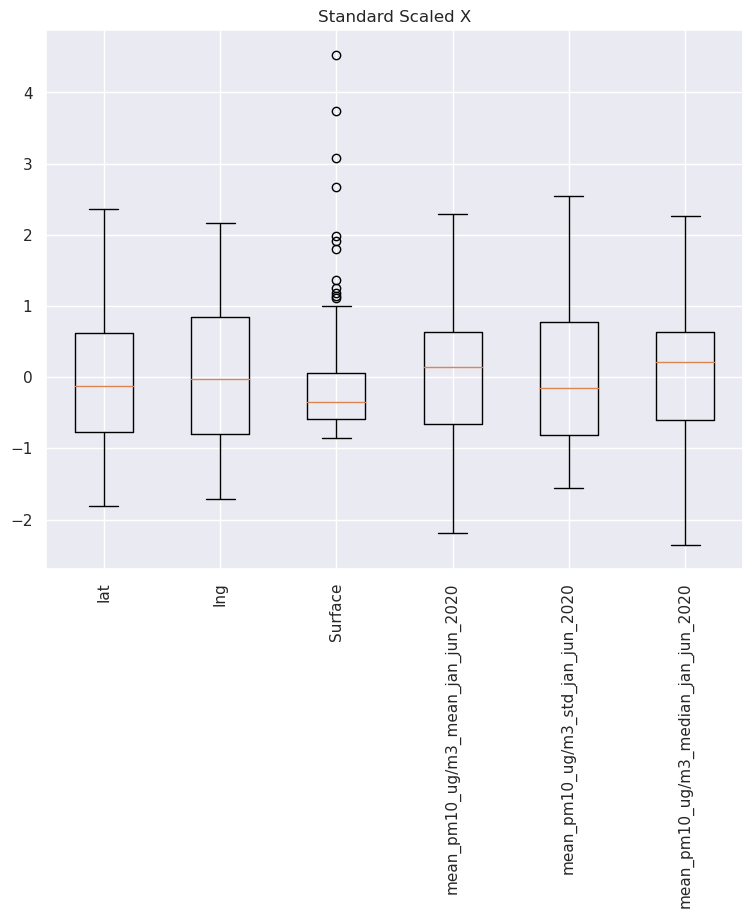

In [84]:
plt.boxplot(std_X,labels=std_X.columns)
plt.title('Standard Scaled X')
plt.xticks(rotation=90)
plt.show()

##### PCA 

In [85]:
pca=PCA()

data_pca_array = pca.fit_transform(std_X)
data_pca = pd.DataFrame(data_pca_array)

Si rappresentano i _loadings_ delle componenti principali in una _heatmap_:

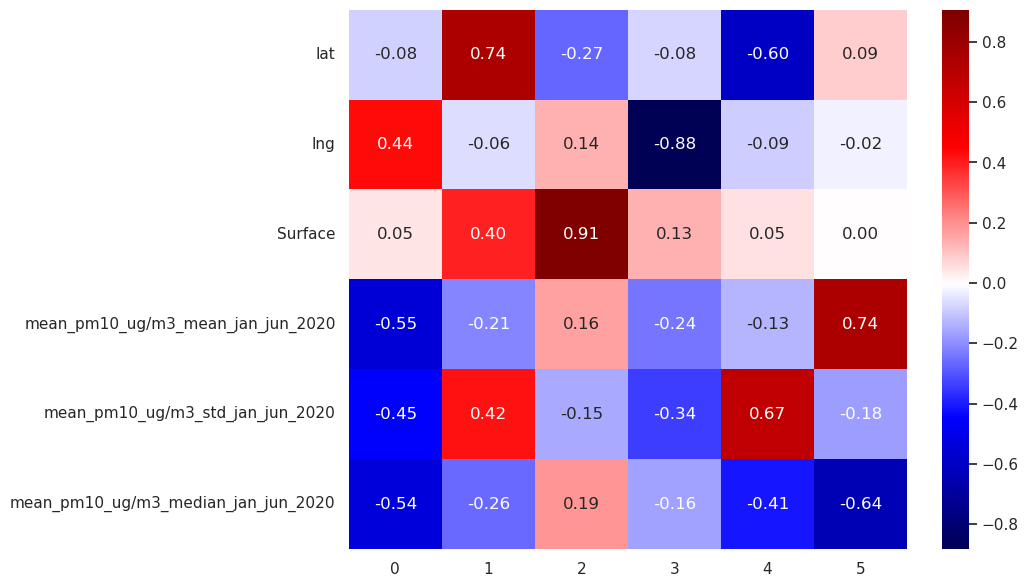

In [86]:
ax = sns.heatmap(
    pca.components_.T,
    yticklabels=X.columns,
    annot=True, 
    fmt='.2f', 
    cmap="seismic",
    center=0
)

Come visto precedentemente, si effettua uno studio sulla proporzione di varianza spiegata dalle componenti principali:

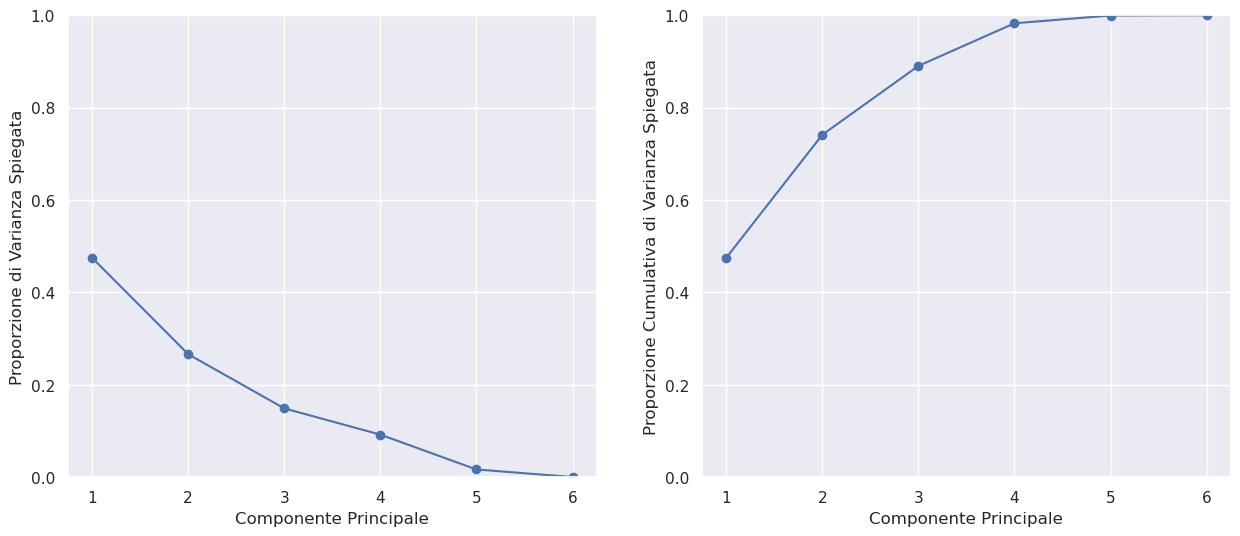

In [87]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
ticks=np.arange(pca.n_components_)+1
ax=axes[0]
ax.plot(
    ticks,
    pca.explained_variance_ratio_,
    marker='o'
)

ax.set_xlabel('Componente Principale')
ax.set_ylabel('Proporzione di Varianza Spiegata')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

ax = axes[1]
ax.plot(
    ticks,
    pca.explained_variance_ratio_.cumsum(),
    marker='o'
)
ax.set_xlabel('Componente Principale')
ax.set_ylabel('Proporzione Cumulativa di Varianza Spiegata')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig.show()

Osservando il grafico, si ritengono opportune un numero di componenti principali pari a 3. Tuttavia, per valutare direttamente qual è il numero migliore di componenti principali da utilizzare, si effettua una _cross validation_:

In [88]:
linear_model = LinearRegression()

# numero di componenti da utilizzare
n_components = np.arange(1, pca.n_components_+1)

# creiamo una lista da riempire con i valori dell'RMSE per ogni set di componenti utilizzate
RMSEs = []

# creiamo un iteratore k-fold per la cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=22)

for i in np.arange(1, data_pca.shape[1] + 1):
    
    RMSE = np.sqrt(
        -cross_val_score(
            linear_model, 
            data_pca.loc[:,:i], 
            y.ravel(), 
            cv=kf, 
            scoring='neg_mean_squared_error'
        ).mean()
    )
    RMSEs.append(RMSE)

# scegliamo il minimo come numero ottimale di componenti principali
optimal_n_components = n_components[np.argmin(RMSEs)]

print("Numero di componenti ottimale:", optimal_n_components)

Numero di componenti ottimale: 1


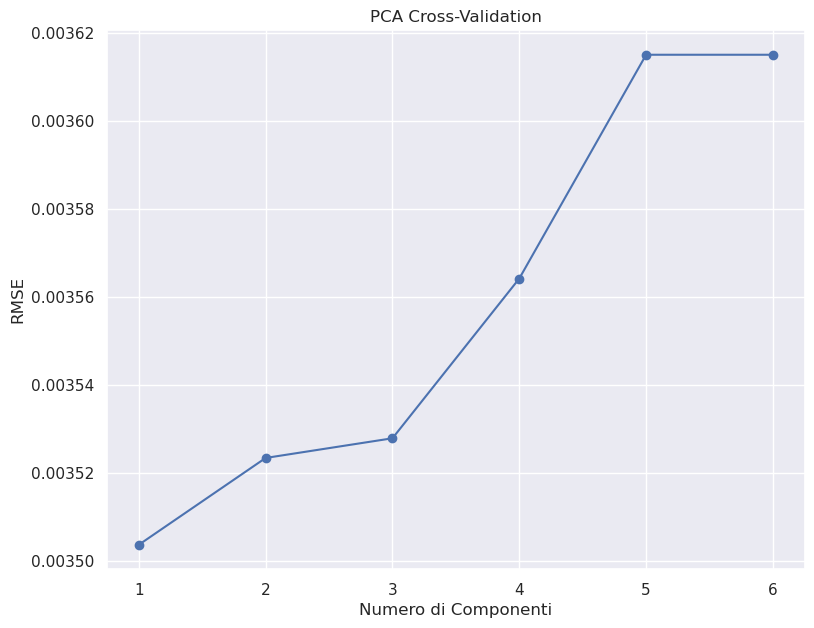

In [89]:
plt.figure()
plt.plot(n_components, RMSEs, marker='o')
plt.xlabel('Numero di Componenti')
plt.ylabel('RMSE')
plt.title('PCA Cross-Validation')
plt.show()

Il numero di componenti ottimale suggerito dalla _cross validation_ è 1. Si procede quindi con l'elaborazione della regressione lineare con 1 componente principale.

##### Train/Test Split

In [90]:
# split into train and test
pca_X_train, pca_X_test, y_train, y_test = train_test_split(
    data_pca[0], 
    y,
    train_size = 0.3,  
    random_state = 22                                     
)
print(len(pca_X_train))
print(len(pca_X_test))

27
65


##### Apprendimento e Valutazione

In [91]:
ols_model = sm.OLS(
    y_train, 
    sm.add_constant(pca_X_train)
).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     CovidCases_jan_jun_2020/Population   R-squared:                       0.009
Model:                                            OLS   Adj. R-squared:                 -0.031
Method:                                 Least Squares   F-statistic:                    0.2299
Date:                                Sun, 27 Aug 2023   Prob (F-statistic):              0.636
Time:                                        19:25:50   Log-Likelihood:                 146.32
No. Observations:                                  27   AIC:                            -288.6
Df Residuals:                                      25   BIC:                            -286.0
Df Model:                                           1                                         
Covariance Type:                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.000      5.147      0.000       0.001       0.002
0          -6.344e-05      0.000     -0.480      0.636      -0.000       0.000
==============================================================================
Omnibus:                        2.972   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.547
Skew:                           0.666   Prob(JB):                        0.280
Kurtosis:                       2.298   Cond. No.                         1.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
y_pred=ols_model.predict(
    sm.add_constant(pca_X_train)
)

test_RMSE=np.sqrt(mean_squared_error(y_train, y_pred))
print(f"train RMSE: {train_RMSE:.4f}")

train RMSE: 0.0009


In [93]:
ratio=train_RMSE/y_train.std()
print(f"Rapporto train RMSE/std: {ratio:.2f}")

Rapporto train RMSE/std: 0.83


In [94]:
ratiio=test_RMSE/y_test.std()
print(f"Rapporto test RMSE/std: {ratio:.2f}")

Rapporto test RMSE/std: 0.83


**In conclusione**, per il modello elaborato tramite PCR: 
* è diminuita la differenza tra errore  di train e errore di test rispetto al semplice modello lineare. Ciò indica un modello più robusto.
* il p-value della prima componente principale non è tale da escludere l'ipotesi nulla, ma lo è quello dell'intercetta.
    Pertanto, nella selezione dei dati analizzata non sembra esserci alcuna dipendenza del _target_ `CovidCases_jan_jun_2020/Population` dai _predictor_

##### Visualizzazione

Si presenta una visualizzazione interattiva del modello ottenuto nello spazio delle componenti principali. L'utente può anche selezionare il tipo di clusterizzazione.

In [95]:
lin_regr_df=data_pca.join(df)

y_pred=ols_model.predict(
    sm.add_constant(data_pca[0])
)

lin_regr_df["y_pred"]=y_pred

In [96]:
import plotly.graph_objs as go
def build_scatter_updater_with_regression(dataframe, y, y_pred, title='Interactive Scatter Plot with Color', **kwargs):
    """ Restituisce un callable che viene chiamato ad ogni update di un plotly.express.scatter plot. 
            Va specificato obbligatoriamente:
                (pd.DataFrame) dataframe: il pd.DataFrame dei dati
                (pd.Series) y: target
                (pd.Series) y_pred: previsioni del modello
            Eventualmente si può specificare:
                (str) title: il titolo del grafico
                kwargs addizionali da passare a plotly.express.scatter
    """
    def scatter_updater(x_feature, color_feature):
        fig = px.scatter(
            dataframe, 
            x=x_feature,
            y=y,
            color=color_feature,
            **kwargs
        )
        fig.update_layout(title=title)
        dataframe.sort_values(by=x_feature, inplace=True)
        fig.add_trace(
            go.Scatter(
                x=dataframe[x_feature],
                y=dataframe[y_pred],
                name='Regression Model'
            )
        )
        fig.show()
        
    return scatter_updater

In [97]:
x_dropdown = widgets.Dropdown(
    options=data_pca.columns,
    description='Componente Principale [asse x]:',
    value=0,
    **style_kwargs
)
color_dropdown = widgets.Dropdown(
    options=clusters_cols,
    description='Clusterizzazione [Colore]:',
    **style_kwargs
)

In [98]:
output = widgets.interactive_output(
    build_scatter_updater_with_regression(
        lin_regr_df, 
        y='CovidCases_jan_jun_2020/Population',
        y_pred="y_pred",
        title="Modello PCR nello spazio delle componenti principali",
        hover_name="City",
        width=900,
        height=600
    ), 
    { 'x_feature': x_dropdown, 'color_feature':color_dropdown}
)

display(x_dropdown, color_dropdown, output)

Dropdown(description='Componente Principale [asse x]:', layout=Layout(width='auto'), options=(0, 1, 2, 3, 4, 5…

Dropdown(description='Clusterizzazione [Colore]:', layout=Layout(width='auto'), options=('PCA_cluster_of_2', '…

Output()

#### DecisionTree Regressor

Si elabora ora un nuovo modello di regressione basato sugli alberi decisionali.

In [99]:
from sklearn.tree import DecisionTreeRegressor,  plot_tree
from sklearn.model_selection import GridSearchCV

##### Simple tree

Come primo approccio si fitta un albero decisionale sul campione di test e si valutano le prestazioni

In [100]:
tree_model = DecisionTreeRegressor(random_state=22)

tree_model.fit(X_train, y_train)

train_RMSE=np.sqrt(mean_squared_error(y_train, tree_model.predict(X_train)))
print(f"Train RMSE: {train_RMSE:.4f}")

Train RMSE: 0.0000


In [101]:
test_RMSE=np.sqrt(mean_squared_error(y_test, tree_model.predict(X_test)))
print(f"Test RMSE: {test_RMSE:.4f}")

Test RMSE: 0.0039


In [102]:
ratio=test_RMSE/y_test.std()
print(f"Rapporto test RMSE/std: {ratio:.2f}")

Rapporto test RMSE/std: 0.99


Si nota che l'errore di training è nullo, quindi il modello sta _overfittando_ i dati. Tuttavia l'errore in fase di test è comparabile a quello dei modelli lineari.
Visualizziamo l'albero appena ottenuto

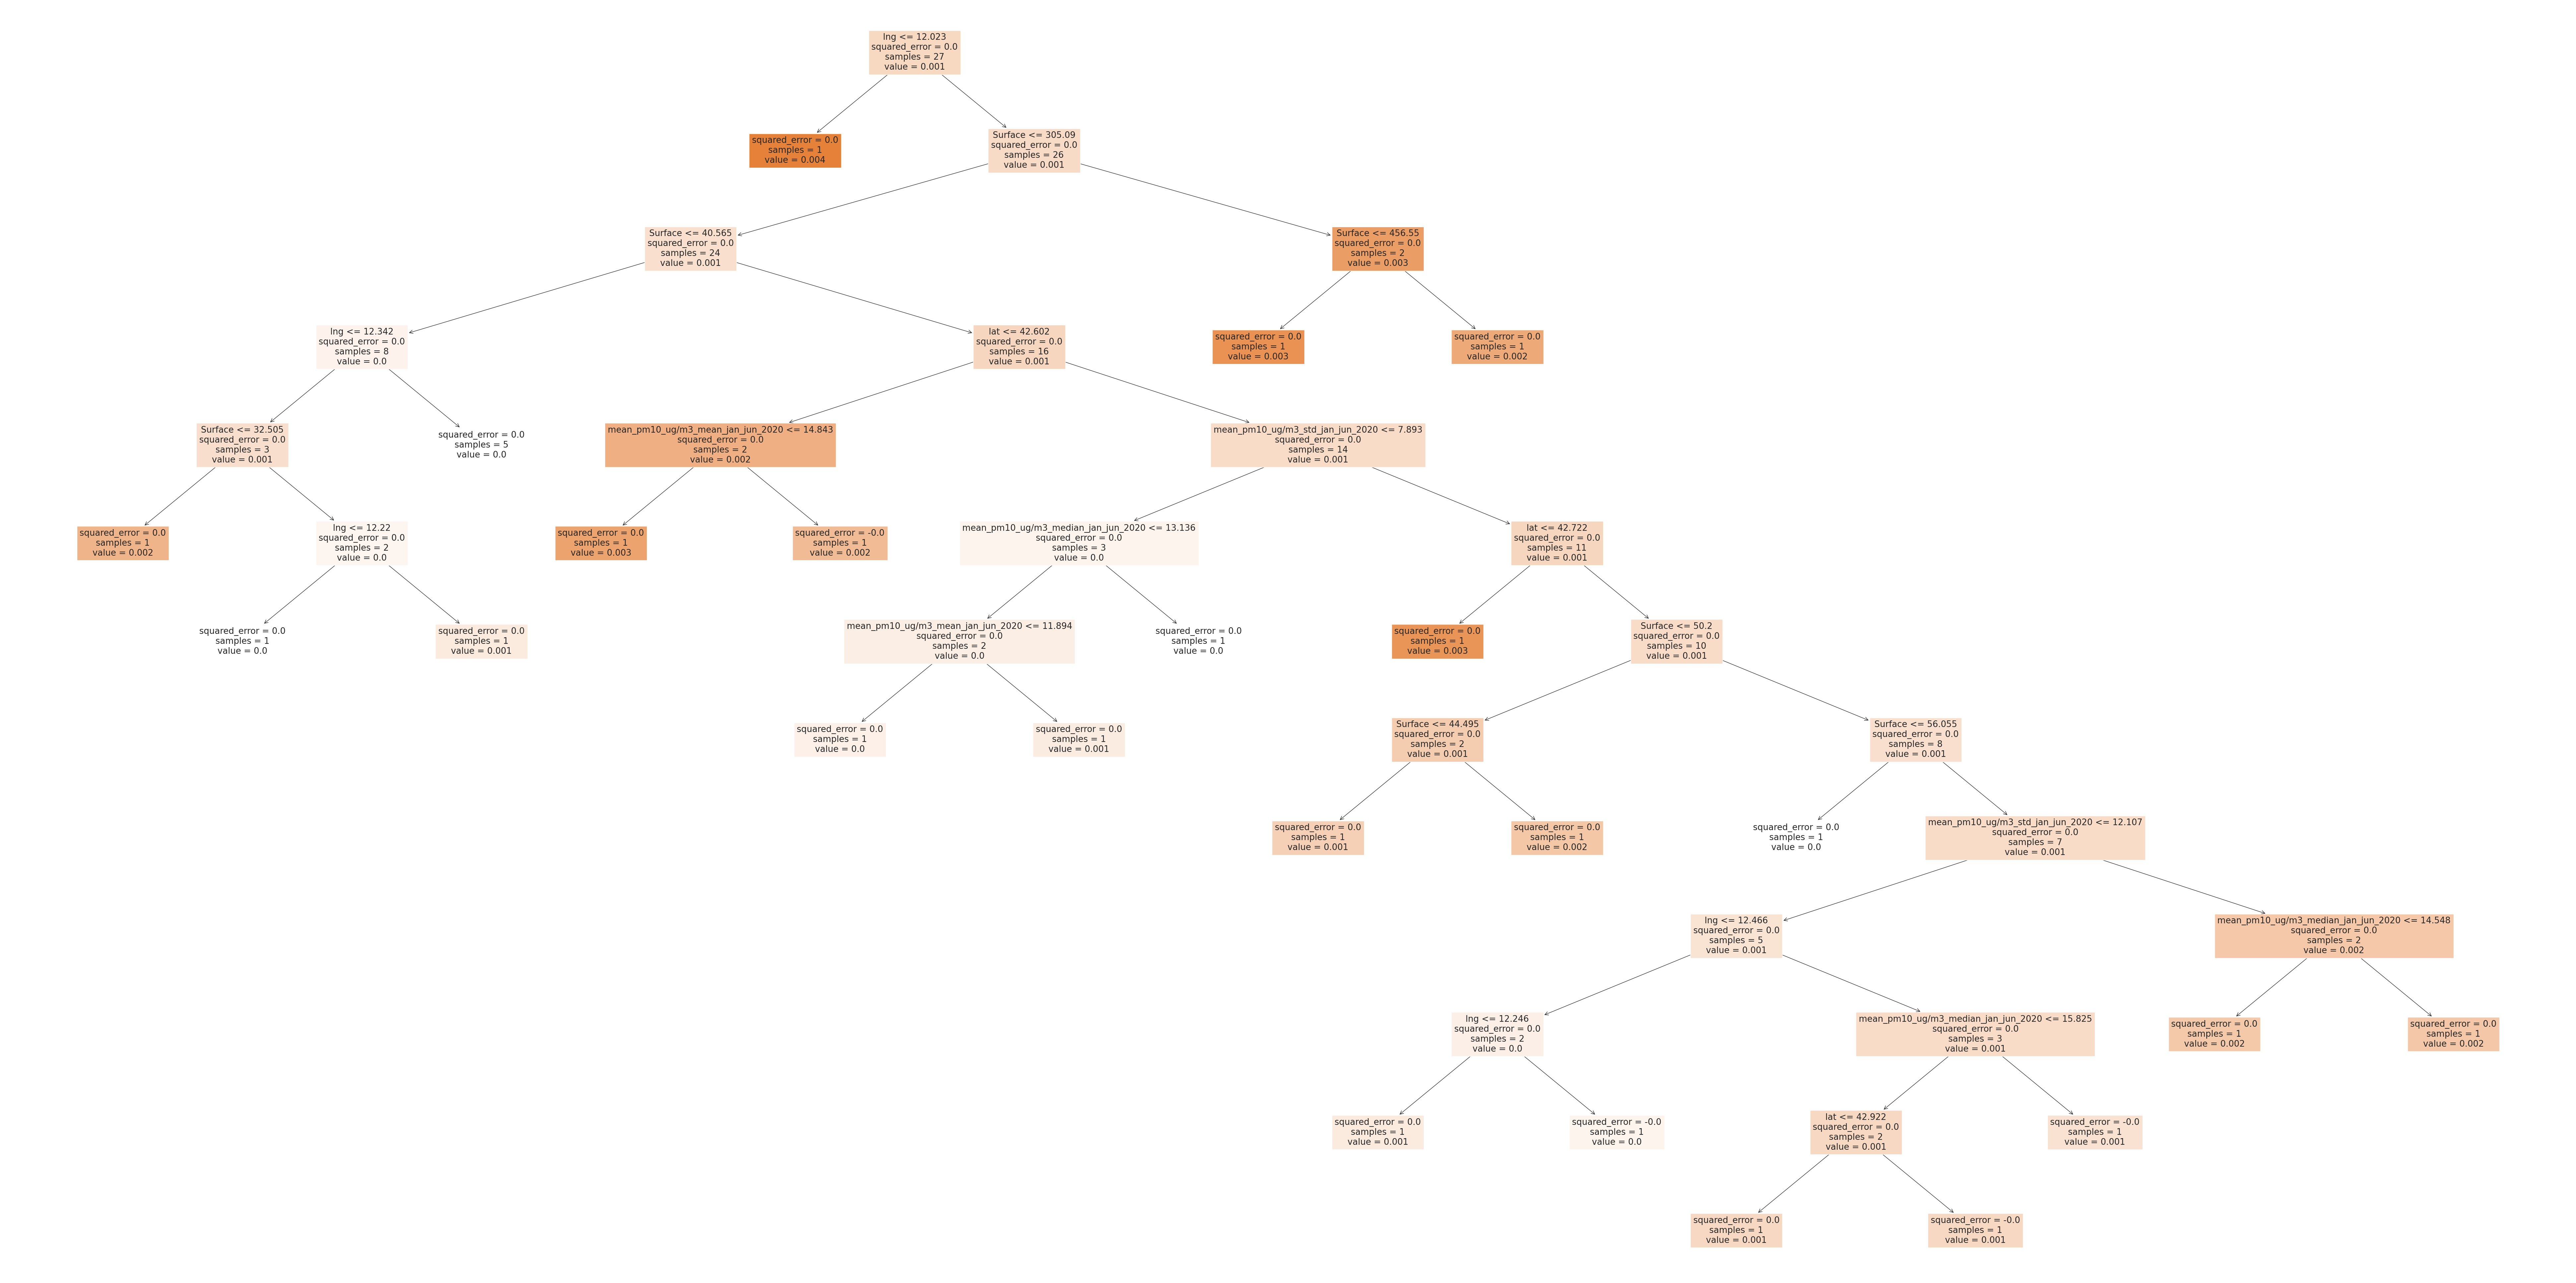

In [103]:
plt.figure(figsize=(100, 50))  # Adjust the figure size as needed
plot_tree(
    tree_model, 
    filled=True, 
    feature_names=list(X.columns)
)
plt.show()

In [104]:
tree_model.tree_.node_count

45

L'albero è molto complesso (45 nodi) e difficilmente interpretabile. Quindi, per costruire un albero più robusto si adotta la tecnica del _pruning_.

##### Cost Complexity Pruning

Si opera una _cross validation_ per selezionare il valore ottimale del parametro `ccp_alpha`. Al crescere del parametro diminuisce il numero di nodi.

In [105]:
ccp_alphas=np.arange(1e-08, 1e-05, 1e-09)

param_grid = {
    'ccp_alpha': ccp_alphas
}
tree_kwargs = { 
    'min_samples_leaf': 2,
    'random_state': 22
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(**tree_kwargs), 
    param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

best_tree_regressor = grid_search.best_estimator_
best_ccp_alpha = best_tree_regressor.ccp_alpha

In [106]:
print(f"Best ccp_alpha: {best_ccp_alpha:.2E}")

Best ccp_alpha: 4.24E-07


In [107]:
mean_scores = -grid_search.cv_results_['mean_test_score']
ccp_alphas = grid_search.cv_results_['param_ccp_alpha'].data.astype(float)

Per ogni `ccp_alpha` preso in considerazione, si allena un albero sul campione di train e si valida sul campione di test.

In [108]:
tree_data=pd.DataFrame({"ccp_alphas":ccp_alphas, "mean_scores":mean_scores})
n_nodes=[]
train_MSEs=[]
test_MSEs=[]
for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(
        ccp_alpha=alpha,
        **tree_kwargs
    )
    
    tree.fit(X_train, y_train)
    n_nodes.append(tree.tree_.node_count)
    
    train_MSE=mean_squared_error(y_train, tree.predict(X_train))
    test_MSE=mean_squared_error(y_test, tree.predict(X_test))
    train_MSEs.append(train_MSE)
    test_MSEs.append(test_MSE)
    
tree_data["n_nodes"]=n_nodes
tree_data["train_MSEs"]=train_MSEs
tree_data["test_MSEs"]=test_MSEs

tree_data

ccp_alphas  mean_scores  n_nodes    train_MSEs  test_MSEs
0     1.000000e-08     0.000003       21  2.605229e-07   0.000016
1     1.100000e-08     0.000003       21  2.605229e-07   0.000016
2     1.200000e-08     0.000003       21  2.605229e-07   0.000016
3     1.300000e-08     0.000003       21  2.605229e-07   0.000016
4     1.400000e-08     0.000003       21  2.605229e-07   0.000016
...            ...          ...      ...           ...        ...
9985  9.995000e-06     0.000001        1  1.160146e-06   0.000016
9986  9.996000e-06     0.000001        1  1.160146e-06   0.000016
9987  9.997000e-06     0.000001        1  1.160146e-06   0.000016
9988  9.998000e-06     0.000001        1  1.160146e-06   0.000016
9989  9.999000e-06     0.000001        1  1.160146e-06   0.000016

[9990 rows x 5 columns]

Si rappresentano gli andamenti del MSE nella _cross validation_, nel _train_ e nel _test_

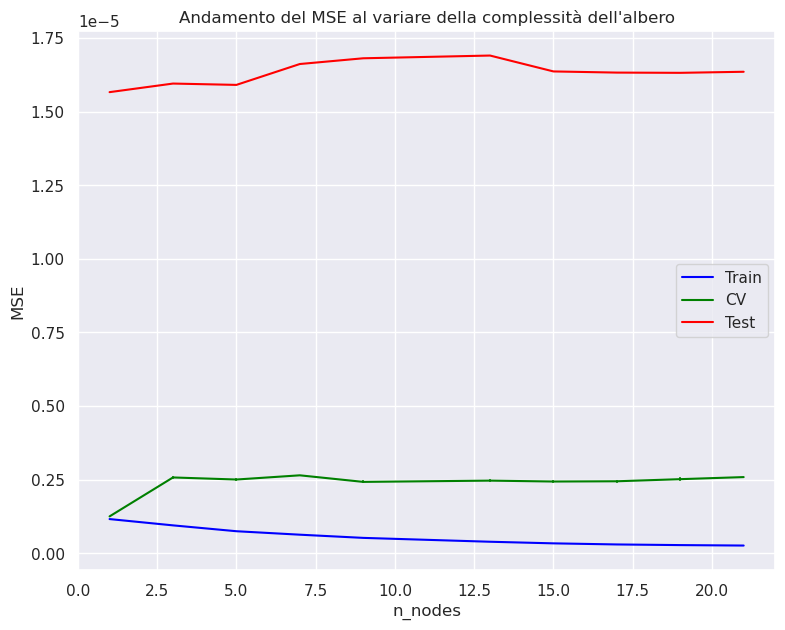

In [109]:
sns.lineplot(data=tree_data, x="n_nodes", y="train_MSEs", marker='', err_style="bars",  label="Train", color="Blue")
sns.lineplot(data=tree_data, x="n_nodes", y="mean_scores", marker='', err_style="bars",  label="CV", color="Green")
sns.lineplot(data=tree_data, x="n_nodes", y="test_MSEs", marker='', err_style="bars",  label="Test", color="Red")

plt.ylabel('MSE')
plt.legend()
plt.title("Andamento del MSE al variare della complessità dell'albero")
plt.show()

Il valore di `ccp_alpha` consigliato produce un albero con un solo nodo:

In [110]:
tree_data.loc[tree_data["ccp_alphas"]==best_ccp_alpha]

ccp_alphas  mean_scores  n_nodes  train_MSEs  test_MSEs
414  4.240000e-07     0.000001        1    0.000001   0.000016

Per questo motivo si rifiuta questo valore `ccp_alpha` e se ne cerca uno che renda il modello più complesso.
Un numero minimo di nodi che si ritiene adatto è 5. Pertanto si cerca un valore di `ccp_alpha` che produce un albero di almeno 5 nodi e il cui errore in fase di _cross validation_ è il minimo possibile:

In [111]:
good_tree=tree_data.loc[tree_data["n_nodes"]>=5].sort_values('mean_scores').head(5)
good_tree

ccp_alphas  mean_scores  n_nodes    train_MSEs  test_MSEs
69  7.900000e-08     0.000002        9  5.210207e-07   0.000017
68  7.800000e-08     0.000002        9  5.210207e-07   0.000017
67  7.700000e-08     0.000002        9  5.210207e-07   0.000017
66  7.600000e-08     0.000002        9  5.210207e-07   0.000017
65  7.500000e-08     0.000002        9  5.210207e-07   0.000017

Si sceglie il primo di questi valori:

In [112]:
tree_regressor = DecisionTreeRegressor(
    ccp_alpha=good_tree.iloc[0].ccp_alphas,
    **tree_kwargs
)
tree_regressor.fit(X_train, y_train)

tree_regressor.tree_.node_count

9

In [113]:
rmse=np.sqrt(mean_squared_error(y_test, tree_regressor.predict(X_test)))
print(f"RMSE: {rmse:.4f}")
print(f"y_test std: {y_test.std():.4f}")

RMSE: 0.0041
y_test std: 0.0039


In [114]:
ratio=rmse/y_test.std()
print(f"Rapporto test RMSE/std: {ratio:.2f}")

Rapporto test RMSE/std: 1.05


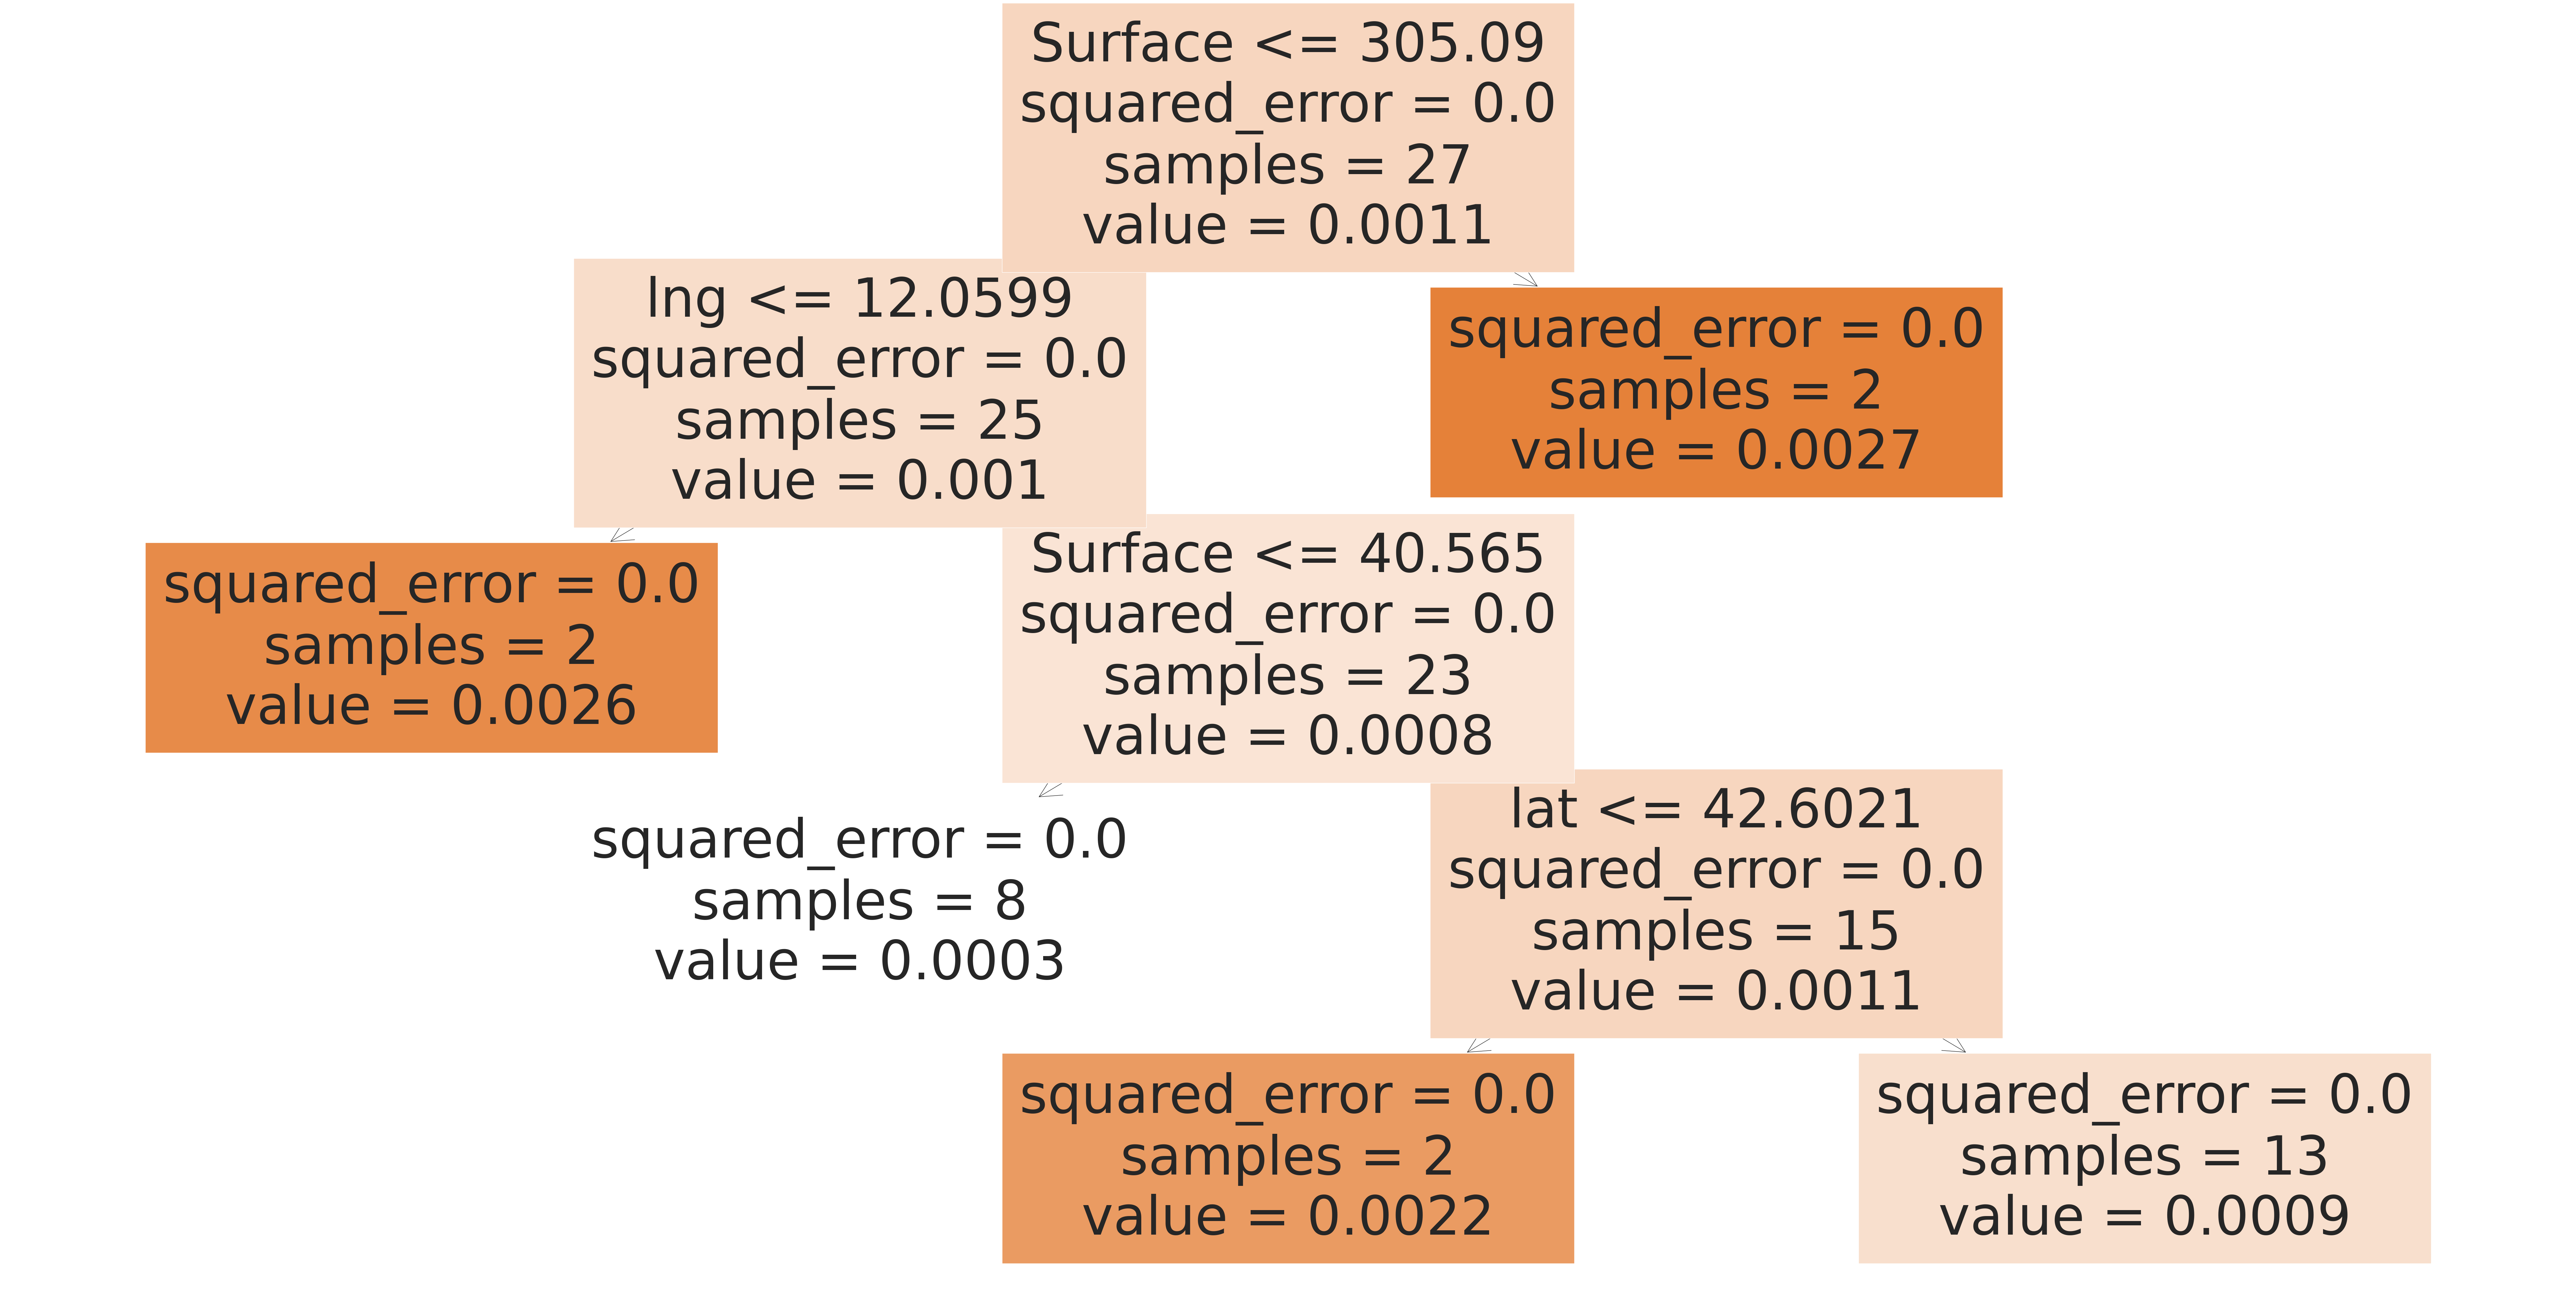

In [115]:
plt.figure(figsize=(100, 50))  # Adjust the figure size as needed
plot_tree(
    tree_regressor, 
    filled=True, 
    feature_names=list(X.columns),
    precision=4
)
plt.title("Decision Tree Regression")
plt.show()

**In conclusione**, si ottiene un albero con un numero di nodi tale da essere interpretato in maniera più agevole dell'albero non "potato".
Il parametro RMSE è confrontabile con la deviazione standard del target, analogamente ai modelli di regressione lineare. 
I _predictor_ che risultano decisivi nella determinazione del _target_ sono `lat`,`lng` e `Surface`.

I _predictor_ relativi all'inquinamento non risultano statisticamente rilevanti secondo questo modello, analogamente al modello  da regressione lineare.